# Questions to ask

Probably we should undersample the min_revenues column, and as well, find out, if there are so many companies with revenues, why didn't they raise?? how could we answer this question? the 99% remaining raised money

Should a model be created for companies that raised on a that want to raise on b, and for those that raised on a and b, that want to raise on c?

Is less employees bad, average, good, so that we applie an ordinal encoder?

Should remove names and id's?

# Beginning

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


In [2]:
path_crunch = '../raw_data/crunchbase.csv'

In [3]:
crunch = pd.read_csv(path_crunch)

/var/folders/fg/0mh3ddwn6ls4kf4146hxrxb00000gn/T/ipykernel_15909/3822556600.py:1: DtypeWarning: Columns (4,11,16,17,18,30,31,32,33,36,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  crunch = pd.read_csv(path_crunch)


In [4]:
crunch.head()

,_id,acquisitions,category,country_code,crunchbase_rank,descriptions.long,descriptions.short,email,employee_range,employees,...,series.series_unknown,series.total,series.undisclosed,socials.facebook,socials.linkedin,socials.twitter,techs,traffic.global_rank,traffic.monthly,website
0,ca17699b-2f49-91f4-5863-7216fc07a64e,"[{""_id"":""a07f601f-d80e-4f67-8996-7f80726b25b4""...",company,gb,309.0,eToro is a social trading investment network t...,eToro is a social trading and investment marke...,support@etoro.com,"[501,1000]","[{""_id"":""f916d557-2c47-27eb-ced9-2a49fd8bb982""...",...,35300000.0,2.227000e+08,NaN,http://www.facebook.com/etoro,https://www.linkedin.com/company/etoro/,http://twitter.com/eToro,"[{""name"":""Viewport Meta"",""category"":""mobile""},...",2549.0,20525524.0,https://www.etoro.com/
1,792dcc41-3650-4496-68ba-481f52ccd99e,[],company,gb,3539.0,GeoSpock is a spatial big data platform compan...,GeoSpock is a spatial big data platform compan...,info@geospock.com,"[11,50]","[{""_id"":""23f56976-1141-4d25-9a0c-7f40e60acebd""...",...,8041980.0,3.824077e+07,NaN,NaN,https://www.linkedin.com/company/geospock-ltd-/,https://twitter.com/geospock,"[{""name"":""Viewport Meta"",""category"":""mobile""},...",6857390.0,709.0,https://www.geospock.com/en/
2,35d239af-cf06-4f04-9387-64a079b641cd,[],company,gb,835.0,Gymshark is an online retailer and technology ...,Gymshark is an online retailer and technology ...,corporate@gymshark.com,"[501,1000]","[{""_id"":""def64484-afd8-482b-82a4-258fe62f7639""...",...,NaN,2.617301e+08,NaN,https://www.facebook.com/Gymshark/,https://www.linkedin.com/company/gymshark/,https://twitter.com/Gymshark,"[{""name"":""IPv6"",""category"":""server""},{""name"":""...",6911.0,7464935.0,https://www.gymshark.com/
3,bb06c586-aac4-4657-39d1-1e428f3f08da,[],company,gb,1450.0,Moneybox now offers a range of saving and inve...,Moneybox is a mobile savings and investment ap...,support@moneyboxapp.com,"[101,250]","[{""_id"":""e9e9034d-eee5-eb7b-836e-db9636a53cce""...",...,NaN,6.986406e+07,NaN,https://www.facebook.com/moneyboxteam/,https://www.linkedin.com/company/digital-moneybox,https://twitter.com/moneyboxteam,"[{""name"":""Viewport Meta"",""category"":""mobile""},...",148195.0,210454.0,https://www.moneyboxapp.com
4,99c2b07b-bbf5-dcac-f768-7b905e940c0e,[],company,gb,1274.0,Oxford Nanopore Technologies aims to disrupt t...,Oxford Nanopore Technologies develops nanopore...,info@nanoporetech.com,"[251,500]","[{""_id"":""f5e4ea8d-70c9-ac60-c80c-f2d871d30a77""...",...,845040507.0,1.142175e+09,NaN,https://www.facebook.com/pages/Oxford-Nanopore...,https://www.linkedin.com/company/oxford-nanopo...,http://twitter.com/nanopore,"[{""name"":""Viewport Meta"",""category"":""mobile""},...",264163.0,95169.0,http://www.nanoporetech.com


### the Column Category has company, investor and school as unique values
HOWEVER, it has values from employee_range column as well. I have to see later if in the values
after having changed the df, if we need these values

In [5]:
crunch.category.unique()

array(['company', 'investor', 'school', nan, '[1,10]', 'true', '[11,50]',
       '[51,100]'], dtype=object)

In [6]:
crunch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311414 entries, 0 to 311413
Data columns (total 52 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   _id                           311394 non-null  object 
 1   acquisitions                  311348 non-null  object 
 2   category                      311369 non-null  object 
 3   country_code                  311413 non-null  object 
 4   crunchbase_rank               311349 non-null  object 
 5   descriptions.long             64060 non-null   object 
 6   descriptions.short            311332 non-null  object 
 7   email                         112326 non-null  object 
 8   employee_range                136292 non-null  object 
 9   employees                     136302 non-null  object 
 10  industries                    134808 non-null  object 
 11  investors                     3433 non-null    object 
 12  legal_name                    16023 non-null

In [7]:
crunch.techs.unique()

array(['[{"name":"Viewport Meta","category":"mobile"},{"name":"IPhone / Mobile Compatible","category":"mobile"},{"name":"ASP.NET","category":"framework"},{"name":"IIS","category":"web_server"},{"name":"GoDaddy","category":"hosting"},{"name":"ASP.NET 4.0","category":"framework"},{"name":"IIS 7","category":"web_server"}]',
       '[{"name":"Viewport Meta","category":"mobile"},{"name":"IPhone / Mobile Compatible","category":"mobile"},{"name":"SPF","category":"mx"},{"name":"SSL by Default","category":"ssl"},{"name":"Google Analytics","category":"analytics"},{"name":"Apple Mobile Web Clips Icon","category":"mobile"},{"name":"Apache","category":"web_server"},{"name":"Content Delivery Network","category":"cdn"},{"name":"Google Tag Manager","category":"widgets"},{"name":"Font Awesome","category":"widgets"}]',
       '[{"name":"IPv6","category":"server"},{"name":"YouTube","category":"media"},{"name":"Google","category":"hosting"},{"name":"ASP.NET","category":"framework"},{"name":"Google Cloud",

# FILTERED ALL DF TO KEEP VALUES THAT WERE SCRAPED

In [8]:
crunch['scraped'].unique()

array([True, nan], dtype=object)

In [9]:
crunch[crunch['scraped']==True]

,_id,acquisitions,category,country_code,crunchbase_rank,descriptions.long,descriptions.short,email,employee_range,employees,...,series.series_unknown,series.total,series.undisclosed,socials.facebook,socials.linkedin,socials.twitter,techs,traffic.global_rank,traffic.monthly,website
0,ca17699b-2f49-91f4-5863-7216fc07a64e,"[{""_id"":""a07f601f-d80e-4f67-8996-7f80726b25b4""...",company,gb,309.0,eToro is a social trading investment network t...,eToro is a social trading and investment marke...,support@etoro.com,"[501,1000]","[{""_id"":""f916d557-2c47-27eb-ced9-2a49fd8bb982""...",...,35300000.0,2.227000e+08,NaN,http://www.facebook.com/etoro,https://www.linkedin.com/company/etoro/,http://twitter.com/eToro,"[{""name"":""Viewport Meta"",""category"":""mobile""},...",2549.0,20525524.0,https://www.etoro.com/
1,792dcc41-3650-4496-68ba-481f52ccd99e,[],company,gb,3539.0,GeoSpock is a spatial big data platform compan...,GeoSpock is a spatial big data platform compan...,info@geospock.com,"[11,50]","[{""_id"":""23f56976-1141-4d25-9a0c-7f40e60acebd""...",...,8041980.0,3.824077e+07,NaN,NaN,https://www.linkedin.com/company/geospock-ltd-/,https://twitter.com/geospock,"[{""name"":""Viewport Meta"",""category"":""mobile""},...",6857390.0,709.0,https://www.geospock.com/en/
2,35d239af-cf06-4f04-9387-64a079b641cd,[],company,gb,835.0,Gymshark is an online retailer and technology ...,Gymshark is an online retailer and technology ...,corporate@gymshark.com,"[501,1000]","[{""_id"":""def64484-afd8-482b-82a4-258fe62f7639""...",...,NaN,2.617301e+08,NaN,https://www.facebook.com/Gymshark/,https://www.linkedin.com/company/gymshark/,https://twitter.com/Gymshark,"[{""name"":""IPv6"",""category"":""server""},{""name"":""...",6911.0,7464935.0,https://www.gymshark.com/
3,bb06c586-aac4-4657-39d1-1e428f3f08da,[],company,gb,1450.0,Moneybox now offers a range of saving and inve...,Moneybox is a mobile savings and investment ap...,support@moneyboxapp.com,"[101,250]","[{""_id"":""e9e9034d-eee5-eb7b-836e-db9636a53cce""...",...,NaN,6.986406e+07,NaN,https://www.facebook.com/moneyboxteam/,https://www.linkedin.com/company/digital-moneybox,https://twitter.com/moneyboxteam,"[{""name"":""Viewport Meta"",""category"":""mobile""},...",148195.0,210454.0,https://www.moneyboxapp.com
4,99c2b07b-bbf5-dcac-f768-7b905e940c0e,[],company,gb,1274.0,Oxford Nanopore Technologies aims to disrupt t...,Oxford Nanopore Technologies develops nanopore...,info@nanoporetech.com,"[251,500]","[{""_id"":""f5e4ea8d-70c9-ac60-c80c-f2d871d30a77""...",...,845040507.0,1.142175e+09,NaN,https://www.facebook.com/pages/Oxford-Nanopore...,https://www.linkedin.com/company/oxford-nanopo...,http://twitter.com/nanopore,"[{""name"":""Viewport Meta"",""category"":""mobile""},...",264163.0,95169.0,http://www.nanoporetech.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311409,a70808ad-93c0-4ad2-b859-699a25c79ed8,[],company,it,987325,NaN,Studio Lania is a service center that offers a...,info@studiolania.it,"[1,10]",[],...,NaN,NaN,NaN,NaN,NaN,NaN,"[{""name"":""Viewport Meta"",""category"":""mobile""},...",NaN,NaN,http://studiolania.it
311410,c3bc2993-9072-419e-99a3-08d51802dfc5,[],company,it,905145,NaN,Puntoweb provides services in the realm of web...,info@puntoweb-arezzo.it,"[1,10]",[],...,NaN,NaN,NaN,https://www.facebook.com/PuntowebSitiInternetA...,https://www.linkedin.com/in/puntoweb-arezzo-80...,https://twitter.com/puntowebarezzo,[],NaN,NaN,http://www.puntoweb-arezzo.it
311411,8c003064-a0f0-4d79-9ddc-46854a957894,[],company,it,1140965,NaN,"Cerme is a distributor of hydraulic, thermal a...",jobs@cerme.it,"[11,50]",[],...,NaN,NaN,NaN,NaN,NaN,NaN,"[{""name"":""SPF"",""category"":""mx""},{""name"":""LetsE...",NaN,NaN,http://www.cerme.it
311412,1bab4fea-ea50-4bc1-a28a-91d6de49f921,[],company,it,1150184,NaN,Studio Anna Fileppo is an art firm that offers...,info@studioannafileppo.it,"[1,10]",[],...,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,http://www.studioannafileppo.it


There are 136311 values that are == True. Two cells below we see that there are 175103 nan values

In [10]:
crunch[crunch['scraped']== True]['scraped'].value_counts()

True    136311
Name: scraped, dtype: int64

In [11]:
crunch['scraped'].value_counts()

True    136311
Name: scraped, dtype: int64

There are 136311 false nan, which means that there are 136311 True! so indeed we can change it

In [12]:
crunch['scraped'].isna().value_counts()

True     175103
False    136311
Name: scraped, dtype: int64

In [13]:
crunch = crunch[crunch['scraped']==True]

In [14]:
crunch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136311 entries, 0 to 311413
Data columns (total 52 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   _id                           136311 non-null  object 
 1   acquisitions                  136266 non-null  object 
 2   category                      136266 non-null  object 
 3   country_code                  136311 non-null  object 
 4   crunchbase_rank               136266 non-null  object 
 5   descriptions.long             64053 non-null   object 
 6   descriptions.short            136265 non-null  object 
 7   email                         112297 non-null  object 
 8   employee_range                136256 non-null  object 
 9   employees                     136266 non-null  object 
 10  industries                    134787 non-null  object 
 11  investors                     3417 non-null    object 
 12  legal_name                    16004 non-null

In [15]:
print(f"legal_name nan value counts is =\n {crunch['legal_name'].isna().value_counts()}")
print()
print(f"'name nan values is =\n '{crunch['name'].isna().value_counts()}")
print()
print(f"series.undisclosed nan values are =\n {crunch['series.undisclosed'].isna().value_counts()}")
print()
print(f"series.undisclosed not nan dataframe is\n {crunch[crunch['series.undisclosed'].notna()]['series.undisclosed']}")

legal_name nan value counts is =
 True     120307
False     16004
Name: legal_name, dtype: int64

'name nan values is =
 'False    136311
Name: name, dtype: int64

series.undisclosed nan values are =
 True     136158
False       153
Name: series.undisclosed, dtype: int64

series.undisclosed not nan dataframe is
 19      52500000.0
27      47800000.0
30             0.0
40      30000000.0
50             0.0
           ...    
3929      111740.0
3952    34030000.0
3976           0.0
4016       39564.0
4028      717363.0
Name: series.undisclosed, Length: 153, dtype: float64


# DROPPED COLUMNS I DON'T NEED

In [16]:
crunch['investors'].isna().value_counts()

True     132894
False      3417
Name: investors, dtype: int64

In [17]:
crunch['series'].isna().value_counts()

True    136311
Name: series, dtype: int64

In [18]:
print(crunch['descriptions.long'].isna().value_counts())
print()


True     72258
False    64053
Name: descriptions.long, dtype: int64



In [19]:
print(crunch['descriptions.short'].isna().value_counts())

False    136265
True         46
Name: descriptions.short, dtype: int64


In [20]:
crunch = crunch.drop(columns=['techs','traffic.global_rank', 'website', 'scraped','scraped_light',\
                              'acquisitions','employees','salesforce_id',  \
                              'crunchbase_rank', 'email', 'phone', 'legal_name', 'series.undisclosed',\
                              'socials.facebook', 'socials.linkedin', 'socials.twitter', 'category','series',\
                              'descriptions.long'])

In [21]:
crunch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136311 entries, 0 to 311413
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   _id                           136311 non-null  object 
 1   country_code                  136311 non-null  object 
 2   descriptions.short            136265 non-null  object 
 3   employee_range                136256 non-null  object 
 4   industries                    134787 non-null  object 
 5   investors                     3417 non-null    object 
 6   min_revenues                  79957 non-null   float64
 7   name                          136311 non-null  object 
 8   series.angel                  350 non-null     float64
 9   series.convertible_note       134 non-null     float64
 10  series.corporate_round        66 non-null      float64
 11  series.debt_financing         269 non-null     float64
 12  series.equity_crowdfunding    395 non-null  

# CLEANED INDUSTRIES & TRANSFORMED IT IN A LIST
But i will see how i will put the transformed industries in a set

In [22]:
crunch.industries

0         [{"_id":"ae5718dc-8602-c733-e62b-28e6167091ad"...
1         [{"_id":"99c5404c-0ff5-8ee5-d334-4b944ddb8cd9"...
2         [{"_id":"275ddcbc-27de-ff4f-4e50-6dc26ebf9570"...
3         [{"_id":"68250c3a-6cf5-86fb-281e-9072ae2d4fe8"...
4         [{"_id":"16ad1d6c-c7ee-b6b5-701d-32c79a19dfae"...
                                ...                        
311409    [{"_id":"ad091ee0-0259-f129-7777-10f65213584d"...
311410    [{"_id":"e362ac36-2e59-c58d-08fe-e5c45f13bc64"...
311411    [{"_id":"9b7bff94-c36c-b8d4-8789-69670454fe84"...
311412    [{"_id":"d29852ab-4bbf-95f5-6087-563ff127de71"...
311413    [{"_id":"9bff86a3-0dc8-1420-9a63-3b86f51d2f36"...
Name: industries, Length: 136311, dtype: object

### In the following i replace all nan values for '[]' , since i can't extract nan's and it will give me an error
However, since i am already extracting values within a '[]' i can replace the nan's by that

In [23]:
crunch['industries'].isna().value_counts()

False    134787
True       1524
Name: industries, dtype: int64

In [24]:
for index, colname in enumerate(crunch):
    print()
    print(f'this column is {colname}')
    print(crunch[crunch['industries'].notna()][colname].value_counts())
    print()
    print(f"and this is the same column {colname} but counting how many nan's")
    print(crunch[crunch['industries'].notna()][colname].isna().value_counts())


this column is _id
ca17699b-2f49-91f4-5863-7216fc07a64e    1
637d51c7-944a-439d-bbc4-1abb570167eb    1
c1b4d6d0-e15d-4f73-960d-8c316182901c    1
631caaca-edaa-4d7b-b29a-7d6f50a8d4a7    1
34acb787-8476-493f-acec-941d736f96ef    1
                                       ..
b6b210bc-58b9-2abb-d8de-7d7efbfe8235    1
6fd9ca2f-345e-4307-9948-618a211d6e6b    1
5c61f428-600b-4f3c-bf88-cf376ad4a703    1
a56c14af-237c-4f01-9128-496065274e68    1
137bcfdd-ff15-4bfa-8da9-92b8d3a8d9cd    1
Name: _id, Length: 134787, dtype: int64

and this is the same column _id but counting how many nan's
False    134787
Name: _id, dtype: int64

this column is country_code
gb    53570
de    33190
fr    20681
es    18533
it     8813
Name: country_code, dtype: int64

and this is the same column country_code but counting how many nan's
False    134787
Name: country_code, dtype: int64

this column is descriptions.short
SaaS                                                                                                 

False    134787
Name: industries, dtype: int64

this column is investors
[{"_id":"01a2a666-577c-1673-eba6-74c02aaf2e80","name":"Crowdcube","category":"organization"}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

Shift                4
CCS                  4
CDP                  4
IPS                  4
Roth                 3
                    ..
Balanced Up          1
A&q Partnership      1
Go Car Warranty      1
Media Performance    1
Idea Web             1
Name: name, Length: 133950, dtype: int64

and this is the same column name but counting how many nan's
False    134787
Name: name, dtype: int64

this column is series.angel
0.0           37
1000000.0      7
500000.0       6
700000.0       4
300000.0       4
              ..
1248204.0      1
608142.0       1
2402267.0      1
2154656.0      1
14011882.0     1
Name: series.angel, Length: 283, dtype: int64

and this is the same column series.angel but counting how many nan's
True     134437
False       350
Name: series.angel, dtype: int64

this column is series.convertible_note
0.0           27
100000.0       6
3000000.0      2
500000.0       2
5854882.0      2
              ..
50187.0        1
8200000.0      1
200703.0       1
13431825.0   

True     134626
False       161
Name: series.series_c, dtype: int64

this column is series.series_d
0.0            3
15000000.0     3
40000000.0     3
98000000.0     2
30000000.0     2
9000000.0      2
27000000.0     1
28669478.0     1
38402457.0     1
67937889.0     1
6402753.0      1
8000000.0      1
24347813.0     1
18850661.0     1
26000000.0     1
3717942.0      1
10000000.0     1
3863295.0      1
15063475.0     1
91000000.0     1
17000000.0     1
25600000.0     1
8500000.0      1
95004476.0     1
51000000.0     1
35000000.0     1
200000000.0    1
350000000.0    1
100000000.0    1
39629182.0     1
22500000.0     1
175000000.0    1
65000000.0     1
13300000.0     1
55776025.0     1
50000000.0     1
14743826.0     1
26200000.0     1
5000000.0      1
49696751.0     1
26024994.0     1
25847006.0     1
2500000.0      1
Name: series.series_d, dtype: int64

and this is the same column series.series_d but counting how many nan's
True     134735
False        52
Name: series.series_d, dtype

In [25]:
crunch['industries'].notna().value_counts()

True     134787
False      1524
Name: industries, dtype: int64

In [26]:
crunch[crunch['industries'].notna()]['employee_range'].value_counts()

[1,10]          66152
[11,50]         47338
[51,100]         7950
[101,250]        7184
[251,500]        3615
[501,1000]       2536
[1001,5000]         2
[5001,10000]        1
Name: employee_range, dtype: int64

<B>I WILL SEE IF I CAN FILTER AND REMOVE ALL NANS, INSTEAD OF REPLACING LIKE IN THE FOLLOWING CELL

In [27]:
#crunch['industries'].replace(np.nan, '[]', inplace=True)

<b> NOW crunch BECOMES WHERE INDUSTRIES HAD ZERO NAN'S

In [28]:
crunch = crunch[crunch['industries'].notna()]

In [29]:
extract_dict_industries = lambda row: [lines['name'] for lines in json.loads(row)]

In [30]:
crunch['industries_list']= crunch['industries'].apply(extract_dict_industries)

In [31]:
crunch

,_id,country_code,descriptions.short,employee_range,industries,investors,min_revenues,name,series.angel,series.convertible_note,...,series.series_c,series.series_d,series.series_e,series.series_f,series.series_g,series.series_h,series.series_unknown,series.total,traffic.monthly,industries_list
0,ca17699b-2f49-91f4-5863-7216fc07a64e,gb,eToro is a social trading and investment marke...,"[501,1000]","[{""_id"":""ae5718dc-8602-c733-e62b-28e6167091ad""...","[{""_id"":""48b6b97e-e5ec-a6d6-1cb0-5d3f74b3f9cd""...",NaN,eToro,NaN,NaN,...,2400000.0,27000000.0,150000000.0,NaN,NaN,NaN,35300000.0,2.227000e+08,20525524.0,"[Finance, Financial Services, FinTech, Marketp..."
1,792dcc41-3650-4496-68ba-481f52ccd99e,gb,GeoSpock is a spatial big data platform compan...,"[11,50]","[{""_id"":""99c5404c-0ff5-8ee5-d334-4b944ddb8cd9""...","[{""_id"":""f5b59f45-3dae-1fb6-4a8a-32388e5d6a45""...",NaN,GeoSpock,NaN,5460000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8041980.0,3.824077e+07,709.0,"[Analytics, Artificial Intelligence, Asset Man..."
2,35d239af-cf06-4f04-9387-64a079b641cd,gb,Gymshark is an online retailer and technology ...,"[501,1000]","[{""_id"":""275ddcbc-27de-ff4f-4e50-6dc26ebf9570""...","[{""_id"":""8b8d96f8-9dfe-b27a-8f57-7d266a051dc9""...",NaN,Gymshark,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.617301e+08,7464935.0,"[E-Commerce, Fitness, Lifestyle, Retail, Sport..."
3,bb06c586-aac4-4657-39d1-1e428f3f08da,gb,Moneybox is a mobile savings and investment ap...,"[101,250]","[{""_id"":""68250c3a-6cf5-86fb-281e-9072ae2d4fe8""...","[{""_id"":""a42ecb7f-c057-5a3d-ee4a-690ba8133013""...",NaN,Moneybox,NaN,NaN,...,37707011.0,NaN,NaN,NaN,NaN,NaN,NaN,6.986406e+07,210454.0,"[Banking, Finance, Financial Services, FinTech]"
4,99c2b07b-bbf5-dcac-f768-7b905e940c0e,gb,Oxford Nanopore Technologies develops nanopore...,"[251,500]","[{""_id"":""16ad1d6c-c7ee-b6b5-701d-32c79a19dfae""...","[{""_id"":""c3cffb5d-9b45-d78e-3688-65926897f259""...",NaN,Oxford Nanopore Technologies,NaN,NaN,...,27717643.0,NaN,NaN,NaN,NaN,NaN,845040507.0,1.142175e+09,95169.0,"[Biopharma, Biotechnology, Genetics, Health Di..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311409,a70808ad-93c0-4ad2-b859-699a25c79ed8,it,Studio Lania is a service center that offers a...,"[1,10]","[{""_id"":""ad091ee0-0259-f129-7777-10f65213584d""...",NaN,0.0,Studio Lania,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Accounting, Consulting, Legal]"
311410,c3bc2993-9072-419e-99a3-08d51802dfc5,it,Puntoweb provides services in the realm of web...,"[1,10]","[{""_id"":""e362ac36-2e59-c58d-08fe-e5c45f13bc64""...",NaN,NaN,Puntoweb,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Graphic Design, Marketing, Web Development]"
311411,8c003064-a0f0-4d79-9ddc-46854a957894,it,"Cerme is a distributor of hydraulic, thermal a...","[11,50]","[{""_id"":""9b7bff94-c36c-b8d4-8789-69670454fe84""...",NaN,1000000.0,Cerme,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Direct Marketing, Marketing]"
311412,1bab4fea-ea50-4bc1-a28a-91d6de49f921,it,Studio Anna Fileppo is an art firm that offers...,"[1,10]","[{""_id"":""d29852ab-4bbf-95f5-6087-563ff127de71""...",NaN,NaN,Studio Anna Fileppo,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Brand Marketing, Personal Branding]"


FOLLOWING CELL NOT YET, LATER

In [32]:
crunch = crunch.drop(columns='industries')
crunch.head()


,_id,country_code,descriptions.short,employee_range,investors,min_revenues,name,series.angel,series.convertible_note,series.corporate_round,...,series.series_c,series.series_d,series.series_e,series.series_f,series.series_g,series.series_h,series.series_unknown,series.total,traffic.monthly,industries_list
0,ca17699b-2f49-91f4-5863-7216fc07a64e,gb,eToro is a social trading and investment marke...,"[501,1000]","[{""_id"":""48b6b97e-e5ec-a6d6-1cb0-5d3f74b3f9cd""...",NaN,eToro,NaN,NaN,NaN,...,2400000.0,27000000.0,150000000.0,NaN,NaN,NaN,35300000.0,2.227000e+08,20525524.0,"[Finance, Financial Services, FinTech, Marketp..."
1,792dcc41-3650-4496-68ba-481f52ccd99e,gb,GeoSpock is a spatial big data platform compan...,"[11,50]","[{""_id"":""f5b59f45-3dae-1fb6-4a8a-32388e5d6a45""...",NaN,GeoSpock,NaN,5460000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8041980.0,3.824077e+07,709.0,"[Analytics, Artificial Intelligence, Asset Man..."
2,35d239af-cf06-4f04-9387-64a079b641cd,gb,Gymshark is an online retailer and technology ...,"[501,1000]","[{""_id"":""8b8d96f8-9dfe-b27a-8f57-7d266a051dc9""...",NaN,Gymshark,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.617301e+08,7464935.0,"[E-Commerce, Fitness, Lifestyle, Retail, Sport..."
3,bb06c586-aac4-4657-39d1-1e428f3f08da,gb,Moneybox is a mobile savings and investment ap...,"[101,250]","[{""_id"":""a42ecb7f-c057-5a3d-ee4a-690ba8133013""...",NaN,Moneybox,NaN,NaN,NaN,...,37707011.0,NaN,NaN,NaN,NaN,NaN,NaN,6.986406e+07,210454.0,"[Banking, Finance, Financial Services, FinTech]"
4,99c2b07b-bbf5-dcac-f768-7b905e940c0e,gb,Oxford Nanopore Technologies develops nanopore...,"[251,500]","[{""_id"":""c3cffb5d-9b45-d78e-3688-65926897f259""...",NaN,Oxford Nanopore Technologies,NaN,NaN,NaN,...,27717643.0,NaN,NaN,NaN,NaN,NaN,845040507.0,1.142175e+09,95169.0,"[Biopharma, Biotechnology, Genetics, Health Di..."


In [33]:
crunch.columns

Index(['_id', 'country_code', 'descriptions.short', 'employee_range',
       'investors', 'min_revenues', 'name', 'series.angel',
       'series.convertible_note', 'series.corporate_round',
       'series.debt_financing', 'series.equity_crowdfunding', 'series.grant',
       'series.initial_coin_offering', 'series.non_equity_assistance',
       'series.post_ipo_debt', 'series.post_ipo_equity', 'series.pre_seed',
       'series.private_equity', 'series.secondary_market', 'series.seed',
       'series.series_a', 'series.series_b', 'series.series_c',
       'series.series_d', 'series.series_e', 'series.series_f',
       'series.series_g', 'series.series_h', 'series.series_unknown',
       'series.total', 'traffic.monthly', 'industries_list'],
      dtype='object')

In [34]:
for column in crunch.columns:
    print()
    print(f'The column name is {column} and the unique values are:' )
    print(crunch[column].unique())
    print()


The column name is _id and the unique values are:
['ca17699b-2f49-91f4-5863-7216fc07a64e'
 '792dcc41-3650-4496-68ba-481f52ccd99e'
 '35d239af-cf06-4f04-9387-64a079b641cd' ...
 '8c003064-a0f0-4d79-9ddc-46854a957894'
 '1bab4fea-ea50-4bc1-a28a-91d6de49f921'
 '137bcfdd-ff15-4bfa-8da9-92b8d3a8d9cd']


The column name is country_code and the unique values are:
['gb' 'es' 'fr' 'de' 'it']


The column name is descriptions.short and the unique values are:
['eToro is a social trading and investment marketplace that allows users to trade currencies, commodities, indices, and stocks.'
 'GeoSpock is a spatial big data platform company that provides analytics, visualization, and builds insight.'
 'Gymshark is an online retailer and technology company of fitness apparel and accessories brands.'
 ...
 'Cerme is a distributor of hydraulic, thermal and air conditioning products.'
 'Studio Anna Fileppo is an art firm that offers services for corporate identity and communication.'
 'Idea Web is a web and 

TypeError: unhashable type: 'list'

## other columns to erase

In [35]:
#i got to erase series column, 
#scraped_light, and what for is the column category, there is only
#company, investor, school and nan

In [36]:
crunch['investors'].isna().value_counts()

True     131393
False      3394
Name: investors, dtype: int64

In [37]:
crunch['industries_list'].isna().value_counts()

False    134787
Name: industries_list, dtype: int64

Before i replaced investors, now will remove all nans

In [38]:
crunch['investors'].replace(np.nan, '[]', inplace=True)


In [39]:
extract_dict_investors = lambda row: [lines['name'] for lines in json.loads(row)]

In [40]:
crunch['investors_list']= crunch['investors'].apply(extract_dict_investors)

In [41]:
crunch.head()

,_id,country_code,descriptions.short,employee_range,investors,min_revenues,name,series.angel,series.convertible_note,series.corporate_round,...,series.series_d,series.series_e,series.series_f,series.series_g,series.series_h,series.series_unknown,series.total,traffic.monthly,industries_list,investors_list
0,ca17699b-2f49-91f4-5863-7216fc07a64e,gb,eToro is a social trading and investment marke...,"[501,1000]","[{""_id"":""48b6b97e-e5ec-a6d6-1cb0-5d3f74b3f9cd""...",NaN,eToro,NaN,NaN,NaN,...,27000000.0,150000000.0,NaN,NaN,NaN,35300000.0,2.227000e+08,20525524.0,"[Finance, Financial Services, FinTech, Marketp...","[Cubit Investments, BRM Capital, Spark Capital..."
1,792dcc41-3650-4496-68ba-481f52ccd99e,gb,GeoSpock is a spatial big data platform compan...,"[11,50]","[{""_id"":""f5b59f45-3dae-1fb6-4a8a-32388e5d6a45""...",NaN,GeoSpock,NaN,5460000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,8041980.0,3.824077e+07,709.0,"[Analytics, Artificial Intelligence, Asset Man...","[Parkwalk Advisors, Techstars, Global Brain Co..."
2,35d239af-cf06-4f04-9387-64a079b641cd,gb,Gymshark is an online retailer and technology ...,"[501,1000]","[{""_id"":""8b8d96f8-9dfe-b27a-8f57-7d266a051dc9""...",NaN,Gymshark,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.617301e+08,7464935.0,"[E-Commerce, Fitness, Lifestyle, Retail, Sport...",[General Atlantic]
3,bb06c586-aac4-4657-39d1-1e428f3f08da,gb,Moneybox is a mobile savings and investment ap...,"[101,250]","[{""_id"":""a42ecb7f-c057-5a3d-ee4a-690ba8133013""...",NaN,Moneybox,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.986406e+07,210454.0,"[Banking, Finance, Financial Services, FinTech]","[Oxford Capital Partners, Samos Investments, E..."
4,99c2b07b-bbf5-dcac-f768-7b905e940c0e,gb,Oxford Nanopore Technologies develops nanopore...,"[251,500]","[{""_id"":""c3cffb5d-9b45-d78e-3688-65926897f259""...",NaN,Oxford Nanopore Technologies,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,845040507.0,1.142175e+09,95169.0,"[Biopharma, Biotechnology, Genetics, Health Di...","[IP Group Plc, Lansdowne Partners, Invesco, Il..."


In [42]:
crunch.drop(columns = ['investors'], inplace=True)

In [43]:
crunch

,_id,country_code,descriptions.short,employee_range,min_revenues,name,series.angel,series.convertible_note,series.corporate_round,series.debt_financing,...,series.series_d,series.series_e,series.series_f,series.series_g,series.series_h,series.series_unknown,series.total,traffic.monthly,industries_list,investors_list
0,ca17699b-2f49-91f4-5863-7216fc07a64e,gb,eToro is a social trading and investment marke...,"[501,1000]",NaN,eToro,NaN,NaN,NaN,NaN,...,27000000.0,150000000.0,NaN,NaN,NaN,35300000.0,2.227000e+08,20525524.0,"[Finance, Financial Services, FinTech, Marketp...","[Cubit Investments, BRM Capital, Spark Capital..."
1,792dcc41-3650-4496-68ba-481f52ccd99e,gb,GeoSpock is a spatial big data platform compan...,"[11,50]",NaN,GeoSpock,NaN,5460000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8041980.0,3.824077e+07,709.0,"[Analytics, Artificial Intelligence, Asset Man...","[Parkwalk Advisors, Techstars, Global Brain Co..."
2,35d239af-cf06-4f04-9387-64a079b641cd,gb,Gymshark is an online retailer and technology ...,"[501,1000]",NaN,Gymshark,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.617301e+08,7464935.0,"[E-Commerce, Fitness, Lifestyle, Retail, Sport...",[General Atlantic]
3,bb06c586-aac4-4657-39d1-1e428f3f08da,gb,Moneybox is a mobile savings and investment ap...,"[101,250]",NaN,Moneybox,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.986406e+07,210454.0,"[Banking, Finance, Financial Services, FinTech]","[Oxford Capital Partners, Samos Investments, E..."
4,99c2b07b-bbf5-dcac-f768-7b905e940c0e,gb,Oxford Nanopore Technologies develops nanopore...,"[251,500]",NaN,Oxford Nanopore Technologies,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,845040507.0,1.142175e+09,95169.0,"[Biopharma, Biotechnology, Genetics, Health Di...","[IP Group Plc, Lansdowne Partners, Invesco, Il..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311409,a70808ad-93c0-4ad2-b859-699a25c79ed8,it,Studio Lania is a service center that offers a...,"[1,10]",0.0,Studio Lania,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Accounting, Consulting, Legal]",[]
311410,c3bc2993-9072-419e-99a3-08d51802dfc5,it,Puntoweb provides services in the realm of web...,"[1,10]",NaN,Puntoweb,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Graphic Design, Marketing, Web Development]",[]
311411,8c003064-a0f0-4d79-9ddc-46854a957894,it,"Cerme is a distributor of hydraulic, thermal a...","[11,50]",1000000.0,Cerme,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Direct Marketing, Marketing]",[]
311412,1bab4fea-ea50-4bc1-a28a-91d6de49f921,it,Studio Anna Fileppo is an art firm that offers...,"[1,10]",NaN,Studio Anna Fileppo,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Brand Marketing, Personal Branding]",[]


In [44]:
crunch['series.total'].isna().value_counts()

True     130961
False      3826
Name: series.total, dtype: int64

In [45]:
crunch.min_revenues.isna().value_counts()

False    79553
True     55234
Name: min_revenues, dtype: int64

In [46]:
crunch[crunch.min_revenues.isna()].loc[:,'series.angel':]

,series.angel,series.convertible_note,series.corporate_round,series.debt_financing,series.equity_crowdfunding,series.grant,series.initial_coin_offering,series.non_equity_assistance,series.post_ipo_debt,series.post_ipo_equity,...,series.series_d,series.series_e,series.series_f,series.series_g,series.series_h,series.series_unknown,series.total,traffic.monthly,industries_list,investors_list
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,27000000.0,150000000.0,NaN,NaN,NaN,35300000.0,2.227000e+08,20525524.0,"[Finance, Financial Services, FinTech, Marketp...","[Cubit Investments, BRM Capital, Spark Capital..."
1,NaN,5460000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8041980.0,3.824077e+07,709.0,"[Analytics, Artificial Intelligence, Asset Man...","[Parkwalk Advisors, Techstars, Global Brain Co..."
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.617301e+08,7464935.0,"[E-Commerce, Fitness, Lifestyle, Retail, Sport...",[General Atlantic]
3,NaN,NaN,NaN,NaN,8852844.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.986406e+07,210454.0,"[Banking, Finance, Financial Services, FinTech]","[Oxford Capital Partners, Samos Investments, E..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,845040507.0,1.142175e+09,95169.0,"[Biopharma, Biotechnology, Genetics, Health Di...","[IP Group Plc, Lansdowne Partners, Invesco, Il..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Guides, Information Technology, Tourism, Travel]",[]
311404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Analytics, Consulting, Data Integration, Mana...",[]
311406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Computer, Hardware, Hospitality, Marketing]",[]
311410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Graphic Design, Marketing, Web Development]",[]


<b> What follows means that from all companies without revenues, 51409 of companies are nan or didn't raise.
<b> but 3825 that are false in nans, which mean, there are values, means 3825 companies without revenues raised

In [47]:
crunch[crunch.min_revenues.isna()]['series.total'].isna().value_counts()

True     51409
False     3825
Name: series.total, dtype: int64

<b>both cells that follow are the same, it means that there are 79552 values that are nan, meaning 79552 are empty or <b>didn't raise. However only 1 WITH REVENUES raised

In [48]:
crunch[~crunch.min_revenues.isna()]['series.total'].isna().value_counts()

True     79552
False        1
Name: series.total, dtype: int64

In [49]:
crunch[crunch.min_revenues.notna()]['series.total'].isna().value_counts()

True     79552
False        1
Name: series.total, dtype: int64

In [50]:
crunch.columns

Index(['_id', 'country_code', 'descriptions.short', 'employee_range',
       'min_revenues', 'name', 'series.angel', 'series.convertible_note',
       'series.corporate_round', 'series.debt_financing',
       'series.equity_crowdfunding', 'series.grant',
       'series.initial_coin_offering', 'series.non_equity_assistance',
       'series.post_ipo_debt', 'series.post_ipo_equity', 'series.pre_seed',
       'series.private_equity', 'series.secondary_market', 'series.seed',
       'series.series_a', 'series.series_b', 'series.series_c',
       'series.series_d', 'series.series_e', 'series.series_f',
       'series.series_g', 'series.series_h', 'series.series_unknown',
       'series.total', 'traffic.monthly', 'industries_list', 'investors_list'],
      dtype='object')

In [51]:
crunch.corr

<bound method DataFrame.corr of                                          _id country_code  \
0       ca17699b-2f49-91f4-5863-7216fc07a64e           gb   
1       792dcc41-3650-4496-68ba-481f52ccd99e           gb   
2       35d239af-cf06-4f04-9387-64a079b641cd           gb   
3       bb06c586-aac4-4657-39d1-1e428f3f08da           gb   
4       99c2b07b-bbf5-dcac-f768-7b905e940c0e           gb   
...                                      ...          ...   
311409  a70808ad-93c0-4ad2-b859-699a25c79ed8           it   
311410  c3bc2993-9072-419e-99a3-08d51802dfc5           it   
311411  8c003064-a0f0-4d79-9ddc-46854a957894           it   
311412  1bab4fea-ea50-4bc1-a28a-91d6de49f921           it   
311413  137bcfdd-ff15-4bfa-8da9-92b8d3a8d9cd           it   

                                       descriptions.short employee_range  \
0       eToro is a social trading and investment marke...     [501,1000]   
1       GeoSpock is a spatial big data platform compan...        [11,50]   
2      

In [52]:
test = crunch.dropna()

### WHY THE FOLLOWING RESULT?

In [53]:
test #why th8s?

,_id,country_code,descriptions.short,employee_range,min_revenues,name,series.angel,series.convertible_note,series.corporate_round,series.debt_financing,...,series.series_d,series.series_e,series.series_f,series.series_g,series.series_h,series.series_unknown,series.total,traffic.monthly,industries_list,investors_list


In [54]:
df = crunch.drop_duplicates() #TRY THIS ONE IS NOT WORKING, AND ASK WHY

TypeError: unhashable type: 'list'

In [ ]:
crunch

# DROPPED MORE COLUMNS - should     have only one function for this

In [ ]:
df = df.drop(columns=['series.angel', 'series.convertible_note',
       'series.corporate_round', 'series.debt_financing',
       'series.equity_crowdfunding', 'series.grant',
       'series.initial_coin_offering', 'series.non_equity_assistance',
       'series.post_ipo_debt', 'series.post_ipo_equity', 'series.pre_seed',
       'series.private_equity', 'series.secondary_market', 'series.seed',
       'series.series_a', 'series.series_b', 'series.series_c',
       'series.series_d', 'series.series_e', 'series.series_f',
       'series.series_g', 'series.series_h', 'series.series_unknown',
       'series.total', 'series.undisclosed'])

# TREATING EMPLOYEE_RANGE

In [55]:
#employee_clean = lambda x: x[1:-1].split(',')

In [56]:
crunch['employee_range'].unique()

array(['[501,1000]', '[11,50]', '[101,250]', '[251,500]', '[51,100]',
       '[1,10]', nan, '[1001,5000]', '[5001,10000]'], dtype=object)

In [57]:
test = crunch['employee_range'][0]
test

'[501,1000]'

In [58]:
employee_clean = lambda x: int(np.mean([ int(a) for a in x[1:-1].split(',')]))

In [59]:
result = employee_clean(test)

In [60]:
result

750

In [61]:
crunch['employee_range'].isna().value_counts()

False    134778
True          9
Name: employee_range, dtype: int64

In [62]:
df = crunch[crunch['employee_range'].notna()]

In [63]:
print(f" df shape is {df.shape}")
print()
print(f"crunch shape is {crunch.shape}")

 df shape is (134778, 33)

crunch shape is (134787, 33)


In [64]:
#type(result[0])

In [65]:
df['employee_range']= df['employee_range'].apply(employee_clean)

/var/folders/fg/0mh3ddwn6ls4kf4146hxrxb00000gn/T/ipykernel_15909/287898358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['employee_range']= df['employee_range'].apply(employee_clean)


In [66]:
df.head()

,_id,country_code,descriptions.short,employee_range,min_revenues,name,series.angel,series.convertible_note,series.corporate_round,series.debt_financing,...,series.series_d,series.series_e,series.series_f,series.series_g,series.series_h,series.series_unknown,series.total,traffic.monthly,industries_list,investors_list
0,ca17699b-2f49-91f4-5863-7216fc07a64e,gb,eToro is a social trading and investment marke...,750,NaN,eToro,NaN,NaN,NaN,NaN,...,27000000.0,150000000.0,NaN,NaN,NaN,35300000.0,2.227000e+08,20525524.0,"[Finance, Financial Services, FinTech, Marketp...","[Cubit Investments, BRM Capital, Spark Capital..."
1,792dcc41-3650-4496-68ba-481f52ccd99e,gb,GeoSpock is a spatial big data platform compan...,30,NaN,GeoSpock,NaN,5460000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8041980.0,3.824077e+07,709.0,"[Analytics, Artificial Intelligence, Asset Man...","[Parkwalk Advisors, Techstars, Global Brain Co..."
2,35d239af-cf06-4f04-9387-64a079b641cd,gb,Gymshark is an online retailer and technology ...,750,NaN,Gymshark,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.617301e+08,7464935.0,"[E-Commerce, Fitness, Lifestyle, Retail, Sport...",[General Atlantic]
3,bb06c586-aac4-4657-39d1-1e428f3f08da,gb,Moneybox is a mobile savings and investment ap...,175,NaN,Moneybox,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.986406e+07,210454.0,"[Banking, Finance, Financial Services, FinTech]","[Oxford Capital Partners, Samos Investments, E..."
4,99c2b07b-bbf5-dcac-f768-7b905e940c0e,gb,Oxford Nanopore Technologies develops nanopore...,375,NaN,Oxford Nanopore Technologies,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,845040507.0,1.142175e+09,95169.0,"[Biopharma, Biotechnology, Genetics, Health Di...","[IP Group Plc, Lansdowne Partners, Invesco, Il..."


# TREATING INDUSTRIES LIST

In [67]:
industries_dict_complete = {
"Education": [ "Charter Schools", "Children", "Continuing Education", "Corporate Training", "E-Learning", "EdTech", "Education", "Higher Education", "Tutoring", "Universities", "Vocational Education" ],
"Business_Products_And_Services": [ "Accounting", "Advice", "Alumni", "Association", "B2B", "B2C", "Billing", "Brand Marketing", "Business Development", "Call Center", "Career Planning", "Charity", "Consulting", "Contact Management", "Coworking", "Creative Agency", "CRM", "Customer Service", "Digital Marketing", "Direct Sales", "Email Marketing", "Enterprise", "Freelance", "Information Services", "Innovation Management", "Intellectual Property", "Interior Design", "Knowledge Management", "Laundry and Dry-cleaning", "Lead Generation", "Legal", "Local", "Local Advertising", "Local Business", "Loyalty Programs", "Management Consulting", "Market Research", "Marketing", "Non Profit", "Outsourcing", "Price Comparison", "Procurement", "Product Management", "Product Research", "Professional Services", "Public Relations", "Quality Assurance", "Reservations", "Sales", "Self-Storage", "Service Industry", "Small and Medium Businesses", "Social Entrepreneurship", "Social Impact", "Social Media Management", "Social Media Marketing", "Subscription Service", "Supply Chain Management", "Ticketing", "Trade Shows", "Transaction Processing", "Translation Service", "Virtual Workforce", "Warehousing", "Wholesale" ],
"software": ["A/B Testing", "Analytics", "Application Performance Management", "Archiving Service", "Big Data", "Business Information Systems", "Business Intelligence", "CivicTech", "Cloud Computing", "Cloud Data Services", "Cloud Infrastructure", "Cloud Management", "Cloud Security", "Cloud Storage", "Collaboration", "Consumer Software", "Data Center", "Data Center Automation", "Data Integration", "Data Mining", "Data Storage", "Data Visualization", "Database", "Desktop Apps", "Developer APIs", "Developer Platform", "Developer Tools", "Document Management", "Domain Registrar", "E-Commerce Platforms", "E-Signature", "Electronic Design Automation (EDA)", "Email", "Embedded Software", "Embedded Systems", "Enterprise Applications", "Enterprise Resource Planning (ERP)", "Enterprise Software", "File Sharing", "Graphic Design", "IaaS", "Information Technology", "IT Management", "Legal Tech", "Linux", "Management Information Systems", "Marketing Automation", "Meeting Software", "MMO Games", "Online Games", "Open Source", "Operating Systems", "PaaS", "PC Games", "Photo Editing", "Presentation Software", "Productivity Tools", "Project Management", "Reading Apps", "SaaS", "Sales Automation", "Scheduling", "Serious Games", "Software", "Software Engineering", "Usability Testing", "UX Design", "Video Editing", "Virtualization", "Web Design", "Web Development", "Web Hosting"],
"media_traditional": ["Ad Exchange", "Ad Network", "Ad Retargeting", "Ad Server", "Ad Targeting", "Advertising", "Advertising Platforms", "Animation", "Art", "Blogging Platforms", "Broadcasting", "Digital Entertainment", "Digital Media", "EBooks", "Film", "Film Production", "Independent Music", "Internet Radio", "Journalism", "Media and Entertainment", "Music", "Music Label", "Music Streaming", "News", "Outdoor Advertising", "Podcast", "Politics", "Publishing", "TV", "TV Production"],
"agriculture": ["Agriculture", "AgTech", "Animal Feed", "Aquaculture", "Cannabis", "Farmers Market", "Farming", "Forestry", "Fruit", "Hydroponics", "Organic"],
"transportation": ["Air Transportation", "Automotive", "Autonomous Vehicles", "Car Sharing", "Delivery", "Delivery Service", "Electric Vehicle", "Fleet Management", "Freight Service", "Last Mile Transportation", "Logistics", "Marine Transportation", "Parking", "Public Transportation", "Railroad", "Recreational Vehicles", "Ride Sharing", "Same Day Delivery", "Shipping", "Space Travel", "Taxi Service", "Transportation", "Water Transportation"],
"Healthcare": ['Alternative Medicine', 'Bioinformatics', 'Biopharma', 'Biotechnology', 'Child Care', 'Clinical Trials', 'Cosmetic Surgery', 'Dental', 'Elder Care', 'Elderly', 'Electronic Health Record (EHR)', 'Emergency Medicine', 'Funerals', 'Genetics', 'Health', 'Health Care', 'Health Diagnostics', 'Home Health Care', 'Hospital', 'Life Science', 'Medical', 'Medical Device', 'Neuroscience', 'Nursing and Residential Care', 'Personal Health', 'Pharmaceutical', 'Quantified Self', 'Rehabilitation', 'Therapeutics', 'Veterinary', 'Wellness'],
"Mobile_And_Telecommunications": ['Android', 'App Marketing', 'Apps', 'Augmented Reality', 'Communications Infrastructure', 'GPS', 'iOS', 'Location Based Services', 'Messaging', 'Mobile', 'Mobile Advertising', 'Mobile Apps', 'Mobile Devices', 'NFC', 'QR Codes', 'Satellite Communication', 'SMS', 'Telecommunications', 'Unified Communications', 'Video Conferencing', 'VoIP', 'Wireless'],
"Financial": ["Angel Investment", "Asset Management", "Auto Insurance", "Banking", "Bitcoin", "Blockchain", "Consumer Lending", "Credit", "Credit Cards", "Crowdfunding", "Cryptocurrency", "Debit Cards", "Debt Collections", "Emerging Markets", "Ethereum", "Finance", "Financial Exchanges", "Financial Services", "FinTech", "Funding Platform", "Health Insurance", "Hedge Funds", "Impact Investing", "Insurance", "InsurTech", "Leasing", "Lending", "Life Insurance", "Mobile Payments", "Payments", "Personal Finance", "Prediction Markets", "Property Insurance", "Real Estate Investment", "Retirement", "Risk Management", "Trading Platform", "Venture Capital", "Wealth Management"],
"artificial_intelligence": ["Artificial Intelligence", "Computer Vision", "Facial Recognition", "Gamification", "Human Computer Interaction", "Image Recognition", "Intelligent Systems", "Language Learning", "Machine Learning", "MOOC", "Motion Capture", "Natural Language Processing", "Personalization", "Predictive Analytics", "Quantum Computing", "Real Time", "Robotics", "Semantic Search", "Semantic Web", "Simulation", "Smart Building", "Smart Cities", "Smart Home", "Speech Recognition", "Text Analytics", "Virtual Assistant", "Virtual Reality", "Visual Search"],
"Retail_NonInternetMobile": ['Auctions', 'Beauty', 'Classifieds', 'Collaborative Consumption', 'Consumer', 'Consumer Goods', 'Cosmetics', 'Coupons', 'DIY', 'E-Commerce', 'Eyewear', 'Fashion', "Fast-Moving Consumer Goods", 'Flowers', 'Gift', 'Gift Card', 'Jewelry', 'Lingerie', 'Local Shopping', "Men's", 'Musical Instruments', 'Rental', 'Retail', 'Shoes', 'Shopping', 'Social Shopping', 'Sporting Goods', 'Toys', "Women's"],
"Electronics": ['Audio', 'Consumer Electronics', 'Digital Signage', 'Electronics', 'Laser', 'Lighting', 'Optical Communication', 'RFID', 'Semiconductor', 'Sensor', 'Wearables'],
"Food_And_Beverages": ['Baby', 'Bakery', 'Catering', 'Coffee', 'Confectionery', 'Cooking', 'Craft Beer', 'Dietary Supplements', 'Food and Beverage', 'Food Delivery', 'Food Processing', 'Grocery', 'Nutraceutical', 'Nutrition', 'Organic Food', 'Pet', 'Recipes', 'Restaurants', 'Seafood', 'Snack Food', 'Tea', 'Wine And Spirits', 'Winery'],
"energy_and_utilities": ["Battery", "Biomass Energy", "Clean Energy", "CleanTech", "Electrical Distribution", "Energy", "Energy Efficiency", "Energy Management", "Energy Storage", "Fossil Fuels", "Fuel", "Fuel Cell", "Infrastructure", "Natural Resources", "Nuclear", "Oil and Gas", "Power Grid", "Renewable Energy", "Solar", "Water", "Wind Energy"],
"risk_and_security": ['Biometrics', 'Compliance', 'Cyber Security', 'Fraud Detection', 'Homeland Security', 'Identity Management', 'Intrusion Detection', 'Law Enforcement', 'Military', 'Network Security', 'Physical Security', 'Privacy', 'Public Safety', 'Reputation', 'Security'],
"Computer_Hardware_And_Services": ['CAD', 'Computer', 'Hardware', 'IT Infrastructure', 'Network Hardware', 'Point of Sale', 'Private Cloud', 'Retail Technology', 'Technical Support'],
"real_estate": ["Commercial Real Estate", "Property Development", "Property Management", "Real Estate", "Rental Property", "Residential", "Timeshare", "Travel Accommodations", "Vacation Rental"],
"internet": ["Communities", "Consumer Applications", "Consumer Reviews", "Content", "Content Creators", "Content Delivery Network", "Content Discovery", "Content Marketing", "Crowdsourcing", "ICT", "Internet", "Internet of Things", "ISP", "Mapping Services", "Marketplace", "Navigation", "Online Auctions", "Online Portals", "Peer to Peer", "Photo Sharing", "Private Social Networking", "Product Search", "Q&A", "Search Engine", "SEM", "SEO", "Sharing Economy", "Social", "Social Bookmarking", "Social Media", "Social Media Advertising", "Social Network", "Social News", "Video", "Video Advertising", "Video Chat", "Video on Demand", "Video Streaming", "Virtual World", "Web Apps", "Web Browsers"],
"hr_people_needs": ['Employee Benefits', 'Employment', 'Family', 'Human Resources', 'Parenting', 'Personal Branding', 'Personal Development', 'Professional Networking', 'Recruiting', 'Skill Assessment', 'Social Recruiting', 'Staffing Agency', 'Training'],
"environmental_services_and_equipment": ['Environmental Consulting', 'Environmental Engineering', 'Green Building', 'Green Consumer Goods', 'GreenTech', 'Janitorial Service', 'Landscaping', 'Marine Technology', 'Packaging Services', 'Parks', 'Pollution Control', 'Printing', 'Recycling', 'Sustainability', 'Waste Management', 'Water Purification']
}


In [68]:
cleaning_ind_complete = lambda row: set( [k for k, v in industries_dict_complete.items() if set(row).intersection(set(v)) ])


In [69]:
df['industries_list'].isna().value_counts()

False    134778
Name: industries_list, dtype: int64

In [70]:
df['industries_cleaned'] = df['industries_list'].apply(cleaning_ind_complete)

/var/folders/fg/0mh3ddwn6ls4kf4146hxrxb00000gn/T/ipykernel_15909/810472489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['industries_cleaned'] = df['industries_list'].apply(cleaning_ind_complete)


In [71]:
df['industries_cleaned']

0                                     {internet, Financial}
1         {Business_Products_And_Services, transportatio...
2                                {Retail_NonInternetMobile}
3                                               {Financial}
4                                              {Healthcare}
                                ...                        
311409                     {Business_Products_And_Services}
311410           {software, Business_Products_And_Services}
311411                     {Business_Products_And_Services}
311412    {hr_people_needs, Business_Products_And_Services}
311413    {software, Retail_NonInternetMobile, Business_...
Name: industries_cleaned, Length: 134778, dtype: object

In [72]:
df.drop(columns='industries_list', inplace=True)

/var/folders/fg/0mh3ddwn6ls4kf4146hxrxb00000gn/T/ipykernel_15909/2722904541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='industries_list', inplace=True)


In [73]:
df

,_id,country_code,descriptions.short,employee_range,min_revenues,name,series.angel,series.convertible_note,series.corporate_round,series.debt_financing,...,series.series_d,series.series_e,series.series_f,series.series_g,series.series_h,series.series_unknown,series.total,traffic.monthly,investors_list,industries_cleaned
0,ca17699b-2f49-91f4-5863-7216fc07a64e,gb,eToro is a social trading and investment marke...,750,NaN,eToro,NaN,NaN,NaN,NaN,...,27000000.0,150000000.0,NaN,NaN,NaN,35300000.0,2.227000e+08,20525524.0,"[Cubit Investments, BRM Capital, Spark Capital...","{internet, Financial}"
1,792dcc41-3650-4496-68ba-481f52ccd99e,gb,GeoSpock is a spatial big data platform compan...,30,NaN,GeoSpock,NaN,5460000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8041980.0,3.824077e+07,709.0,"[Parkwalk Advisors, Techstars, Global Brain Co...","{Business_Products_And_Services, transportatio..."
2,35d239af-cf06-4f04-9387-64a079b641cd,gb,Gymshark is an online retailer and technology ...,750,NaN,Gymshark,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.617301e+08,7464935.0,[General Atlantic],{Retail_NonInternetMobile}
3,bb06c586-aac4-4657-39d1-1e428f3f08da,gb,Moneybox is a mobile savings and investment ap...,175,NaN,Moneybox,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.986406e+07,210454.0,"[Oxford Capital Partners, Samos Investments, E...",{Financial}
4,99c2b07b-bbf5-dcac-f768-7b905e940c0e,gb,Oxford Nanopore Technologies develops nanopore...,375,NaN,Oxford Nanopore Technologies,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,845040507.0,1.142175e+09,95169.0,"[IP Group Plc, Lansdowne Partners, Invesco, Il...",{Healthcare}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311409,a70808ad-93c0-4ad2-b859-699a25c79ed8,it,Studio Lania is a service center that offers a...,5,0.0,Studio Lania,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],{Business_Products_And_Services}
311410,c3bc2993-9072-419e-99a3-08d51802dfc5,it,Puntoweb provides services in the realm of web...,5,NaN,Puntoweb,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],"{software, Business_Products_And_Services}"
311411,8c003064-a0f0-4d79-9ddc-46854a957894,it,"Cerme is a distributor of hydraulic, thermal a...",30,1000000.0,Cerme,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],{Business_Products_And_Services}
311412,1bab4fea-ea50-4bc1-a28a-91d6de49f921,it,Studio Anna Fileppo is an art firm that offers...,5,NaN,Studio Anna Fileppo,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],"{hr_people_needs, Business_Products_And_Services}"


## SUM ALL SERIES THIS ONE NOT YET

In [74]:
df.columns

Index(['_id', 'country_code', 'descriptions.short', 'employee_range',
       'min_revenues', 'name', 'series.angel', 'series.convertible_note',
       'series.corporate_round', 'series.debt_financing',
       'series.equity_crowdfunding', 'series.grant',
       'series.initial_coin_offering', 'series.non_equity_assistance',
       'series.post_ipo_debt', 'series.post_ipo_equity', 'series.pre_seed',
       'series.private_equity', 'series.secondary_market', 'series.seed',
       'series.series_a', 'series.series_b', 'series.series_c',
       'series.series_d', 'series.series_e', 'series.series_f',
       'series.series_g', 'series.series_h', 'series.series_unknown',
       'series.total', 'traffic.monthly', 'investors_list',
       'industries_cleaned'],
      dtype='object')

In [ ]:
df.loc[:10, 'series.angel':'series.series_unknown']


In [ ]:
df.loc[:, 'series.angel':'series.series_unknown']

In [ ]:
tmp = df.loc[:, 'series.angel':'series.series_unknown']

In [ ]:
tmp.replace(np.nan, float(0.0), inplace=True)

In [ ]:
tmp['total funds']= tmp.sum(axis=1)

In [ ]:
tmp[tmp['total funds']>0]['total funds'].shape

In [ ]:
df[df['series.total']>0]['series.total'].shape

WHAT HAPPENED MEANS THAT SERIES.TOTAL HAS 18 MORE DATA ON FUNDS, OVERALL

# CHANGED Total funds into 1 or 0 if funds True

In [97]:
df

,_id,country_code,descriptions.short,employee_range,min_revenues,name,series.angel,series.convertible_note,series.corporate_round,series.debt_financing,...,series.series_e,series.series_f,series.series_g,series.series_h,series.series_unknown,series.total,traffic.monthly,investors_list,industries_cleaned,funds_binary
0,ca17699b-2f49-91f4-5863-7216fc07a64e,gb,eToro is a social trading and investment marke...,750,NaN,eToro,0.0,0.0,0.0,0.0,...,150000000.0,0.0,0.0,0.0,35300000.0,2.227000e+08,20525524.0,"[Cubit Investments, BRM Capital, Spark Capital...","{internet, Financial}",1
1,792dcc41-3650-4496-68ba-481f52ccd99e,gb,GeoSpock is a spatial big data platform compan...,30,NaN,GeoSpock,0.0,5460000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8041980.0,3.824077e+07,709.0,"[Parkwalk Advisors, Techstars, Global Brain Co...","{Business_Products_And_Services, transportatio...",1
2,35d239af-cf06-4f04-9387-64a079b641cd,gb,Gymshark is an online retailer and technology ...,750,NaN,Gymshark,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.617301e+08,7464935.0,[General Atlantic],{Retail_NonInternetMobile},1
3,bb06c586-aac4-4657-39d1-1e428f3f08da,gb,Moneybox is a mobile savings and investment ap...,175,NaN,Moneybox,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.986406e+07,210454.0,"[Oxford Capital Partners, Samos Investments, E...",{Financial},1
4,99c2b07b-bbf5-dcac-f768-7b905e940c0e,gb,Oxford Nanopore Technologies develops nanopore...,375,NaN,Oxford Nanopore Technologies,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,845040507.0,1.142175e+09,95169.0,"[IP Group Plc, Lansdowne Partners, Invesco, Il...",{Healthcare},1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311409,a70808ad-93c0-4ad2-b859-699a25c79ed8,it,Studio Lania is a service center that offers a...,5,0.0,Studio Lania,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,NaN,[],{Business_Products_And_Services},0
311410,c3bc2993-9072-419e-99a3-08d51802dfc5,it,Puntoweb provides services in the realm of web...,5,NaN,Puntoweb,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,NaN,[],"{software, Business_Products_And_Services}",0
311411,8c003064-a0f0-4d79-9ddc-46854a957894,it,"Cerme is a distributor of hydraulic, thermal a...",30,1000000.0,Cerme,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,NaN,[],{Business_Products_And_Services},0
311412,1bab4fea-ea50-4bc1-a28a-91d6de49f921,it,Studio Anna Fileppo is an art firm that offers...,5,NaN,Studio Anna Fileppo,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,NaN,[],"{hr_people_needs, Business_Products_And_Services}",0


In [75]:
df['funds_binary'] = df['series.total'].apply(lambda x: int(1) if x>0 else int(0))

/var/folders/fg/0mh3ddwn6ls4kf4146hxrxb00000gn/T/ipykernel_15909/3966491064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['funds_binary'] = df['series.total'].apply(lambda x: int(1) if x>0 else int(0))


In [76]:
type(df['funds_binary'][0])

numpy.int64

In [77]:
list(enumerate(df))
total = 0
for (index, colname) in enumerate(df):
    print(index, colname, df[colname][3])
    if index >5 and index <29:
        total = total + df[colname][3]
print(f'total is {total}')

for (index, colname) in enumerate(df):
    if 'series' in colname:
        df[colname].replace(np.nan, 0.0, inplace=True)
        
df.loc[:10, 'series.angel':'series.undisclosed']

#df['series.angel':'series.undisclosed'].replace(np.nan, 0.0, inplace=True)

#df['series.angel':'series.undisclosed'].

df['total funds']= df.iloc[:, 6:31].sum(axis =1)

(df['total funds']>0).value_counts()

df.info()

0 _id bb06c586-aac4-4657-39d1-1e428f3f08da
1 country_code gb
2 descriptions.short Moneybox is a mobile savings and investment app that offers a range of saving and investment products including Lifetime ISAs and Pensions.
3 employee_range 175
4 min_revenues nan
5 name Moneybox
6 series.angel nan
7 series.convertible_note nan
8 series.corporate_round nan
9 series.debt_financing nan
10 series.equity_crowdfunding 8852844.0
11 series.grant nan
12 series.initial_coin_offering nan
13 series.non_equity_assistance nan
14 series.post_ipo_debt nan
15 series.post_ipo_equity nan
16 series.pre_seed nan
17 series.private_equity nan
18 series.secondary_market nan
19 series.seed 4750000.0
20 series.series_a nan
21 series.series_b 18554203.0
22 series.series_c 37707011.0
23 series.series_d nan
24 series.series_e nan
25 series.series_f nan
26 series.series_g nan
27 series.series_h nan
28 series.series_unknown nan
29 series.total 69864058.0
30 traffic.monthly 210454.0
31 investors_list ['Oxford Capital P

/var/folders/fg/0mh3ddwn6ls4kf4146hxrxb00000gn/T/ipykernel_15909/826625329.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colname].replace(np.nan, 0.0, inplace=True)


KeyError: 'series.undisclosed'

In [ ]:
df

In [78]:
df.shape

(134778, 34)

In [79]:
df.isnull().sum().sort_values(ascending=False) 

traffic.monthly                 84088
min_revenues                    55226
descriptions.short                  1
_id                                 0
series.series_f                     0
series.series_a                     0
series.series_b                     0
series.series_c                     0
series.series_d                     0
series.series_e                     0
series.series_h                     0
series.series_g                     0
series.secondary_market             0
series.series_unknown               0
series.total                        0
investors_list                      0
industries_cleaned                  0
series.seed                         0
series.private_equity               0
country_code                        0
series.pre_seed                     0
series.post_ipo_equity              0
series.post_ipo_debt                0
series.non_equity_assistance        0
series.initial_coin_offering        0
series.grant                        0
series.equit

In [80]:
df.isna().sum().sort_values(ascending=False) 

traffic.monthly                 84088
min_revenues                    55226
descriptions.short                  1
_id                                 0
series.series_f                     0
series.series_a                     0
series.series_b                     0
series.series_c                     0
series.series_d                     0
series.series_e                     0
series.series_h                     0
series.series_g                     0
series.secondary_market             0
series.series_unknown               0
series.total                        0
investors_list                      0
industries_cleaned                  0
series.seed                         0
series.private_equity               0
country_code                        0
series.pre_seed                     0
series.post_ipo_equity              0
series.post_ipo_debt                0
series.non_equity_assistance        0
series.initial_coin_offering        0
series.grant                        0
series.equit

I HAVE TO REMOVE THE 1 VALUE IN NULL FOR DESCRIPTIONS.SHORT

INVESTORS LIST IS NOT REALLY FULL, IT HAS LOTS OF '[]'

WHAT DO WE DO WE DESCRIPTIONS.SHORT AND WITH ALL SERIES RE STANDARDIZATION ETC

SERIES.TOTAL HAS 130953 empty values

In [81]:
df['series.total'].isna().value_counts()

False    134778
Name: series.total, dtype: int64

In [82]:
df['descriptions.short'].notna().value_counts()

True     134777
False         1
Name: descriptions.short, dtype: int64

In [83]:
df= df[df['descriptions.short'].notna()]

In [84]:
df.shape


(134777, 34)

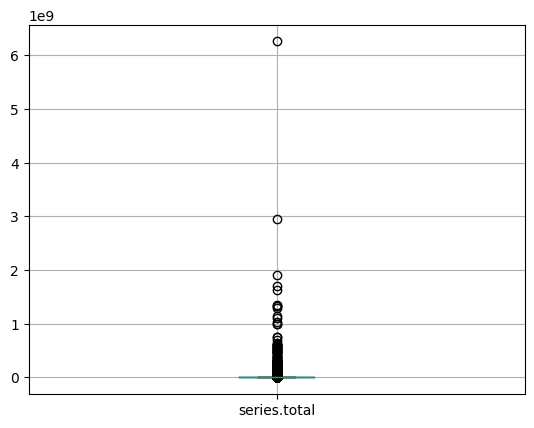

In [85]:
df[['series.total']].boxplot();

In [86]:
df[['traffic.monthly']].boxplot();

### WHAT DO I DO HERE?


In [87]:
df.duplicated()

TypeError: unhashable type: 'list'

In [88]:
df

,_id,country_code,descriptions.short,employee_range,min_revenues,name,series.angel,series.convertible_note,series.corporate_round,series.debt_financing,...,series.series_e,series.series_f,series.series_g,series.series_h,series.series_unknown,series.total,traffic.monthly,investors_list,industries_cleaned,funds_binary
0,ca17699b-2f49-91f4-5863-7216fc07a64e,gb,eToro is a social trading and investment marke...,750,NaN,eToro,0.0,0.0,0.0,0.0,...,150000000.0,0.0,0.0,0.0,35300000.0,2.227000e+08,20525524.0,"[Cubit Investments, BRM Capital, Spark Capital...","{internet, Financial}",1
1,792dcc41-3650-4496-68ba-481f52ccd99e,gb,GeoSpock is a spatial big data platform compan...,30,NaN,GeoSpock,0.0,5460000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8041980.0,3.824077e+07,709.0,"[Parkwalk Advisors, Techstars, Global Brain Co...","{Business_Products_And_Services, transportatio...",1
2,35d239af-cf06-4f04-9387-64a079b641cd,gb,Gymshark is an online retailer and technology ...,750,NaN,Gymshark,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.617301e+08,7464935.0,[General Atlantic],{Retail_NonInternetMobile},1
3,bb06c586-aac4-4657-39d1-1e428f3f08da,gb,Moneybox is a mobile savings and investment ap...,175,NaN,Moneybox,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.986406e+07,210454.0,"[Oxford Capital Partners, Samos Investments, E...",{Financial},1
4,99c2b07b-bbf5-dcac-f768-7b905e940c0e,gb,Oxford Nanopore Technologies develops nanopore...,375,NaN,Oxford Nanopore Technologies,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,845040507.0,1.142175e+09,95169.0,"[IP Group Plc, Lansdowne Partners, Invesco, Il...",{Healthcare},1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311409,a70808ad-93c0-4ad2-b859-699a25c79ed8,it,Studio Lania is a service center that offers a...,5,0.0,Studio Lania,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,NaN,[],{Business_Products_And_Services},0
311410,c3bc2993-9072-419e-99a3-08d51802dfc5,it,Puntoweb provides services in the realm of web...,5,NaN,Puntoweb,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,NaN,[],"{software, Business_Products_And_Services}",0
311411,8c003064-a0f0-4d79-9ddc-46854a957894,it,"Cerme is a distributor of hydraulic, thermal a...",30,1000000.0,Cerme,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,NaN,[],{Business_Products_And_Services},0
311412,1bab4fea-ea50-4bc1-a28a-91d6de49f921,it,Studio Anna Fileppo is an art firm that offers...,5,NaN,Studio Anna Fileppo,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,NaN,[],"{hr_people_needs, Business_Products_And_Services}",0


1. quel modèles scikitlearn classifier
2. 
- country_code = onehotencoder
- investors list onehotencoder
- industries_cleaned = onehotencoder
- employee_range onehotencoder


In [89]:
df.columns

Index(['_id', 'country_code', 'descriptions.short', 'employee_range',
       'min_revenues', 'name', 'series.angel', 'series.convertible_note',
       'series.corporate_round', 'series.debt_financing',
       'series.equity_crowdfunding', 'series.grant',
       'series.initial_coin_offering', 'series.non_equity_assistance',
       'series.post_ipo_debt', 'series.post_ipo_equity', 'series.pre_seed',
       'series.private_equity', 'series.secondary_market', 'series.seed',
       'series.series_a', 'series.series_b', 'series.series_c',
       'series.series_d', 'series.series_e', 'series.series_f',
       'series.series_g', 'series.series_h', 'series.series_unknown',
       'series.total', 'traffic.monthly', 'investors_list',
       'industries_cleaned', 'funds_binary'],
      dtype='object')

In [90]:
type(df['employee_range'][0])

numpy.int64

In [91]:
for column in df.columns:
    print(f"this column is {column}")
    print("nan values are")
    print()
    print(df[column].isna().value_counts())
    print("\n->unique values are")
    print(df[column].unique())
    print("\nNEXT")

this column is _id
nan values are

False    134777
Name: _id, dtype: int64

->unique values are
['ca17699b-2f49-91f4-5863-7216fc07a64e'
 '792dcc41-3650-4496-68ba-481f52ccd99e'
 '35d239af-cf06-4f04-9387-64a079b641cd' ...
 '8c003064-a0f0-4d79-9ddc-46854a957894'
 '1bab4fea-ea50-4bc1-a28a-91d6de49f921'
 '137bcfdd-ff15-4bfa-8da9-92b8d3a8d9cd']

NEXT
this column is country_code
nan values are

False    134777
Name: country_code, dtype: int64

->unique values are
['gb' 'es' 'fr' 'de' 'it']

NEXT
this column is descriptions.short
nan values are

False    134777
Name: descriptions.short, dtype: int64

->unique values are
['eToro is a social trading and investment marketplace that allows users to trade currencies, commodities, indices, and stocks.'
 'GeoSpock is a spatial big data platform company that provides analytics, visualization, and builds insight.'
 'Gymshark is an online retailer and technology company of fitness apparel and accessories brands.'
 ...
 'Cerme is a distributor of hydraul

[0.0000000e+00 4.1236847e+07 3.7715923e+07 1.0000000e+08 3.0000000e+07
 1.7000000e+07]

NEXT
this column is series.series_g
nan values are

False    134777
Name: series.series_g, dtype: int64

->unique values are
[       0. 78227342. 41311864. 39200000.]

NEXT
this column is series.series_h
nan values are

False    134777
Name: series.series_h, dtype: int64

->unique values are
[0.00000000e+00 1.67860845e+08 5.00000000e+06 1.33000000e+06]

NEXT
this column is series.series_unknown
nan values are

False    134777
Name: series.series_unknown, dtype: int64

->unique values are
[3.53000000e+07 8.04198000e+06 0.00000000e+00 8.45040507e+08
 1.00000000e+07 1.50000000e+07 4.00000000e+07 1.70000000e+07
 1.88000000e+07 5.08782660e+07 1.25000000e+09 3.22462500e+06
 4.81491600e+06 4.40000000e+08 1.18477481e+08 1.65532516e+08
 3.23050000e+07 1.75000000e+07 2.01981530e+07 2.60000000e+07
 4.66507200e+06 1.33107170e+07 3.48938720e+07 1.90000000e+06
 1.40000000e+07 2.46248800e+06 6.00000000e+06 2.81500

TypeError: unhashable type: 'list'

In [92]:
df[df['traffic.monthly'].notna()]['series.total'].isna().value_counts()

False    50689
Name: series.total, dtype: int64

In [93]:
test_employee = df['employee_range'][:10].apply({5: 'tres petit', 750:"gross"})

AttributeError: 'tres petit' is not a valid function for 'Series' object

In [98]:
df

,_id,country_code,descriptions.short,employee_range,min_revenues,name,series.angel,series.convertible_note,series.corporate_round,series.debt_financing,...,series.series_e,series.series_f,series.series_g,series.series_h,series.series_unknown,series.total,traffic.monthly,investors_list,industries_cleaned,funds_binary
0,ca17699b-2f49-91f4-5863-7216fc07a64e,gb,eToro is a social trading and investment marke...,750,NaN,eToro,0.0,0.0,0.0,0.0,...,150000000.0,0.0,0.0,0.0,35300000.0,2.227000e+08,20525524.0,"[Cubit Investments, BRM Capital, Spark Capital...","{internet, Financial}",1
1,792dcc41-3650-4496-68ba-481f52ccd99e,gb,GeoSpock is a spatial big data platform compan...,30,NaN,GeoSpock,0.0,5460000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8041980.0,3.824077e+07,709.0,"[Parkwalk Advisors, Techstars, Global Brain Co...","{Business_Products_And_Services, transportatio...",1
2,35d239af-cf06-4f04-9387-64a079b641cd,gb,Gymshark is an online retailer and technology ...,750,NaN,Gymshark,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.617301e+08,7464935.0,[General Atlantic],{Retail_NonInternetMobile},1
3,bb06c586-aac4-4657-39d1-1e428f3f08da,gb,Moneybox is a mobile savings and investment ap...,175,NaN,Moneybox,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.986406e+07,210454.0,"[Oxford Capital Partners, Samos Investments, E...",{Financial},1
4,99c2b07b-bbf5-dcac-f768-7b905e940c0e,gb,Oxford Nanopore Technologies develops nanopore...,375,NaN,Oxford Nanopore Technologies,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,845040507.0,1.142175e+09,95169.0,"[IP Group Plc, Lansdowne Partners, Invesco, Il...",{Healthcare},1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311409,a70808ad-93c0-4ad2-b859-699a25c79ed8,it,Studio Lania is a service center that offers a...,5,0.0,Studio Lania,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,NaN,[],{Business_Products_And_Services},0
311410,c3bc2993-9072-419e-99a3-08d51802dfc5,it,Puntoweb provides services in the realm of web...,5,NaN,Puntoweb,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,NaN,[],"{software, Business_Products_And_Services}",0
311411,8c003064-a0f0-4d79-9ddc-46854a957894,it,"Cerme is a distributor of hydraulic, thermal a...",30,1000000.0,Cerme,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,NaN,[],{Business_Products_And_Services},0
311412,1bab4fea-ea50-4bc1-a28a-91d6de49f921,it,Studio Anna Fileppo is an art firm that offers...,5,NaN,Studio Anna Fileppo,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,NaN,[],"{hr_people_needs, Business_Products_And_Services}",0


In [99]:
df[['investors_list', 'industries_cleaned', 'employee_range', 'country_code']]

,investors_list,industries_cleaned,employee_range,country_code
0,"[Cubit Investments, BRM Capital, Spark Capital...","{internet, Financial}",750,gb
1,"[Parkwalk Advisors, Techstars, Global Brain Co...","{Business_Products_And_Services, transportatio...",30,gb
2,[General Atlantic],{Retail_NonInternetMobile},750,gb
3,"[Oxford Capital Partners, Samos Investments, E...",{Financial},175,gb
4,"[IP Group Plc, Lansdowne Partners, Invesco, Il...",{Healthcare},375,gb
...,...,...,...,...
311409,[],{Business_Products_And_Services},5,it
311410,[],"{software, Business_Products_And_Services}",5,it
311411,[],{Business_Products_And_Services},30,it
311412,[],"{hr_people_needs, Business_Products_And_Services}",5,it


In [ ]:
columns_to_encode = ['investors_list', 'industries_cleaned', 'employee_range', 'country_code']

encoder = OneHotEncoder()

encoder.fit(df[columns_to_encode])

one_hot_encoded_columns = encoder.transform(df[columns_to_encode]).toarray()

one_hot_encoded_df = pd.DataFrame(one_hot_encoded_columns, columns=encoder.get_feature_names(columns_to_encode))

df = pd.concat([df, one_hot_encoded_df], axis=1)

In [ ]:

# Check unique values for streets (3)
print(f"The unique values for 'Street' are {df.employee_range.unique()}")

# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse = False) 

# Fit encoder
ohe.fit(df[['employee_range']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

# Display the generated names
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")

# Transform the current "Street" column
df[ohe.get_feature_names_out()] = ohe.transform(df[['employee_range']])

# Drop the column "Street" which has been encoded
df.drop(columns = ["employee_range"], inplace = True)

# Show the dataset
df.head(3)

#['investors_list', 'industries_cleaned', 'employee_range', 'country_code']

In [95]:
df[['min_revenues', 'traffic.monthly']]

,min_revenues,traffic.monthly
0,NaN,20525524.0
1,NaN,709.0
2,NaN,7464935.0
3,NaN,210454.0
4,NaN,95169.0
...,...,...
311409,0.0,NaN
311410,NaN,NaN
311411,1000000.0,NaN
311412,NaN,NaN


In [140]:
df

,_id,country_code,descriptions.short,employee_range,min_revenues,name,series.angel,series.convertible_note,series.corporate_round,series.debt_financing,...,series.series_e,series.series_f,series.series_g,series.series_h,series.series_unknown,series.total,traffic.monthly,investors_list,funds_binary,min_revenues_scaled
0,ca17699b-2f49-91f4-5863-7216fc07a64e,gb,eToro is a social trading and investment marke...,750,NaN,eToro,0.0,0.0,0.0,0.0,...,150000000.0,0.0,0.0,0.0,35300000.0,2.227000e+08,20525524.0,"[Cubit Investments, BRM Capital, Spark Capital...",1,NaN
1,792dcc41-3650-4496-68ba-481f52ccd99e,gb,GeoSpock is a spatial big data platform compan...,30,NaN,GeoSpock,0.0,5460000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8041980.0,3.824077e+07,709.0,"[Parkwalk Advisors, Techstars, Global Brain Co...",1,NaN
2,35d239af-cf06-4f04-9387-64a079b641cd,gb,Gymshark is an online retailer and technology ...,750,NaN,Gymshark,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.617301e+08,7464935.0,[General Atlantic],1,NaN
3,bb06c586-aac4-4657-39d1-1e428f3f08da,gb,Moneybox is a mobile savings and investment ap...,175,NaN,Moneybox,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.986406e+07,210454.0,"[Oxford Capital Partners, Samos Investments, E...",1,NaN
4,99c2b07b-bbf5-dcac-f768-7b905e940c0e,gb,Oxford Nanopore Technologies develops nanopore...,375,NaN,Oxford Nanopore Technologies,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,845040507.0,1.142175e+09,95169.0,"[IP Group Plc, Lansdowne Partners, Invesco, Il...",1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311409,a70808ad-93c0-4ad2-b859-699a25c79ed8,it,Studio Lania is a service center that offers a...,5,0.0,Studio Lania,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,NaN,[],0,-0.045322
311410,c3bc2993-9072-419e-99a3-08d51802dfc5,it,Puntoweb provides services in the realm of web...,5,NaN,Puntoweb,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,NaN,[],0,NaN
311411,8c003064-a0f0-4d79-9ddc-46854a957894,it,"Cerme is a distributor of hydraulic, thermal a...",30,1000000.0,Cerme,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,NaN,[],0,-0.037223
311412,1bab4fea-ea50-4bc1-a28a-91d6de49f921,it,Studio Anna Fileppo is an art firm that offers...,5,NaN,Studio Anna Fileppo,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,NaN,[],0,NaN


In [ ]:
#sns.histplot(data['GrLivArea'], bins=200,kde = True); #for distribution
#sns.boxplot(data=data, x='GrLivArea') #for outliers
# Saving the indexes corresponding to rows 
# without the absurd -1 value
# and without the mansion
boolean_mask = (data['GrLivArea']>0) & (data['GrLivArea']<5000)

# Applying the boolean filteraing
data = data[boolean_mask].reset_index(drop=True)

# Visualize boxplot again
data[['GrLivArea']].boxplot(); 


In [ ]:

# Heatmap of pairwise correlations
correlation_matrix = data.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

In [101]:
len(industries_dict_complete.keys())

20

In [102]:
industries_dict_complete.keys()

dict_keys(['Education', 'Business_Products_And_Services', 'software', 'media_traditional', 'agriculture', 'transportation', 'Healthcare', 'Mobile_And_Telecommunications', 'Financial', 'artificial_intelligence', 'Retail_NonInternetMobile', 'Electronics', 'Food_And_Beverages', 'energy_and_utilities', 'risk_and_security', 'Computer_Hardware_And_Services', 'real_estate', 'internet', 'hr_people_needs', 'environmental_services_and_equipment'])

In [103]:
industries_dict_complete.values()

dict_values([['Charter Schools', 'Children', 'Continuing Education', 'Corporate Training', 'E-Learning', 'EdTech', 'Education', 'Higher Education', 'Tutoring', 'Universities', 'Vocational Education'], ['Accounting', 'Advice', 'Alumni', 'Association', 'B2B', 'B2C', 'Billing', 'Brand Marketing', 'Business Development', 'Call Center', 'Career Planning', 'Charity', 'Consulting', 'Contact Management', 'Coworking', 'Creative Agency', 'CRM', 'Customer Service', 'Digital Marketing', 'Direct Sales', 'Email Marketing', 'Enterprise', 'Freelance', 'Information Services', 'Innovation Management', 'Intellectual Property', 'Interior Design', 'Knowledge Management', 'Laundry and Dry-cleaning', 'Lead Generation', 'Legal', 'Local', 'Local Advertising', 'Local Business', 'Loyalty Programs', 'Management Consulting', 'Market Research', 'Marketing', 'Non Profit', 'Outsourcing', 'Price Comparison', 'Procurement', 'Product Management', 'Product Research', 'Professional Services', 'Public Relations', 'Quality 

In [104]:
testing_industries = df

In [ ]:
my_columns = list(industries_dict_complete.keys())

In [ ]:
testing_industries[my_columns] = int(0)

In [ ]:
testing_industries['industries_cleaned'][0]

In [ ]:
for ele in testing_industries['industries_cleaned'][0]:
    print(ele)

In [ ]:
my_list = [2]
for ele in my_list:
    print(ele)

In [ ]:
list(testing_industries['industries_cleaned'][0])

In [ ]:
type(testing_industries['industries_cleaned'][0])

In [ ]:
testing_industries['industries_cleaned']

In [ ]:
#testing_industries['industries_cleaned'].apply(lambda x: for ele in x)

In [ ]:
testing_industries = df

In [ ]:
testing_industries['industries_cleaned']

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
pd.DataFrame(mlb.fit_transform(testing_industries['industries_cleaned']),
             columns=mlb.classes_, index=testing_industries.index)

<B> THE FOLLOWING À-LA-MANO ONEHOTENCODER TAKES TOO LONG!
    

In [ ]:
for index, column in enumerate(testing_industries['industries_cleaned']):
    for ele in column:
        testing_industries.at[index, ele] = 1

In [ ]:
testing_industries

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

cross_validate(model, X, y, cv = 5) # returns test_score, fit_time and score_time

In [133]:
# Create a set of all possible colors
#all_colors = set([color for colors in df['colors'] for color in colors])
all_industries = set(industries_dict_complete.keys())

In [ ]:
df.columns

In [134]:
all_industries

{'Business_Products_And_Services',
 'Computer_Hardware_And_Services',
 'Education',
 'Electronics',
 'Financial',
 'Food_And_Beverages',
 'Healthcare',
 'Mobile_And_Telecommunications',
 'Retail_NonInternetMobile',
 'agriculture',
 'artificial_intelligence',
 'energy_and_utilities',
 'environmental_services_and_equipment',
 'hr_people_needs',
 'internet',
 'media_traditional',
 'real_estate',
 'risk_and_security',
 'software',
 'transportation'}

In [135]:
test_lucas = df

In [138]:
df['industries_cleaned']

KeyError: 'industries_cleaned'

In [136]:

# Define a function to create the new columns
def create_new_columns(row):
    new_row = {}
    for industry in all_industries:
        if industry in row['industries_cleaned']:
            new_row[industry] = 1
        else:
            new_row[industry] = 0
    return new_row



In [137]:
# Apply the function to each row of the DataFrame
new_test_lucas = test_lucas.apply(lambda row: pd.Series(create_new_columns(row)), axis=1)

# Concatenate the original DataFrame with the new DataFrame
#df = pd.concat([df, new_df_testing], axis=1)

# Drop the original 'colors' column
#df.drop('colors', axis=1, inplace=True)

#print(df)

KeyError: 'industries_cleaned'

In [105]:
testing_industries

,_id,country_code,descriptions.short,employee_range,min_revenues,name,series.angel,series.convertible_note,series.corporate_round,series.debt_financing,...,series.series_e,series.series_f,series.series_g,series.series_h,series.series_unknown,series.total,traffic.monthly,investors_list,industries_cleaned,funds_binary
0,ca17699b-2f49-91f4-5863-7216fc07a64e,gb,eToro is a social trading and investment marke...,750,NaN,eToro,0.0,0.0,0.0,0.0,...,150000000.0,0.0,0.0,0.0,35300000.0,2.227000e+08,20525524.0,"[Cubit Investments, BRM Capital, Spark Capital...","{internet, Financial}",1
1,792dcc41-3650-4496-68ba-481f52ccd99e,gb,GeoSpock is a spatial big data platform compan...,30,NaN,GeoSpock,0.0,5460000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8041980.0,3.824077e+07,709.0,"[Parkwalk Advisors, Techstars, Global Brain Co...","{Business_Products_And_Services, transportatio...",1
2,35d239af-cf06-4f04-9387-64a079b641cd,gb,Gymshark is an online retailer and technology ...,750,NaN,Gymshark,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.617301e+08,7464935.0,[General Atlantic],{Retail_NonInternetMobile},1
3,bb06c586-aac4-4657-39d1-1e428f3f08da,gb,Moneybox is a mobile savings and investment ap...,175,NaN,Moneybox,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.986406e+07,210454.0,"[Oxford Capital Partners, Samos Investments, E...",{Financial},1
4,99c2b07b-bbf5-dcac-f768-7b905e940c0e,gb,Oxford Nanopore Technologies develops nanopore...,375,NaN,Oxford Nanopore Technologies,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,845040507.0,1.142175e+09,95169.0,"[IP Group Plc, Lansdowne Partners, Invesco, Il...",{Healthcare},1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311409,a70808ad-93c0-4ad2-b859-699a25c79ed8,it,Studio Lania is a service center that offers a...,5,0.0,Studio Lania,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,NaN,[],{Business_Products_And_Services},0
311410,c3bc2993-9072-419e-99a3-08d51802dfc5,it,Puntoweb provides services in the realm of web...,5,NaN,Puntoweb,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,NaN,[],"{software, Business_Products_And_Services}",0
311411,8c003064-a0f0-4d79-9ddc-46854a957894,it,"Cerme is a distributor of hydraulic, thermal a...",30,1000000.0,Cerme,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,NaN,[],{Business_Products_And_Services},0
311412,1bab4fea-ea50-4bc1-a28a-91d6de49f921,it,Studio Anna Fileppo is an art firm that offers...,5,NaN,Studio Anna Fileppo,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,NaN,[],"{hr_people_needs, Business_Products_And_Services}",0


In [139]:
testing_industries['industries_cleaned']

KeyError: 'industries_cleaned'

In [108]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

df_new_test = testing_industries.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(testing_industries.pop('industries_cleaned')),
                index=testing_industries.index,
                columns=mlb.classes_))

In [ ]:
mlb

In [141]:
df_new_test.shape

(134777, 53)

In [142]:
df_new_test.columns

Index(['_id', 'country_code', 'descriptions.short', 'employee_range',
       'min_revenues', 'name', 'series.angel', 'series.convertible_note',
       'series.corporate_round', 'series.debt_financing',
       'series.equity_crowdfunding', 'series.grant',
       'series.initial_coin_offering', 'series.non_equity_assistance',
       'series.post_ipo_debt', 'series.post_ipo_equity', 'series.pre_seed',
       'series.private_equity', 'series.secondary_market', 'series.seed',
       'series.series_a', 'series.series_b', 'series.series_c',
       'series.series_d', 'series.series_e', 'series.series_f',
       'series.series_g', 'series.series_h', 'series.series_unknown',
       'series.total', 'traffic.monthly', 'investors_list', 'funds_binary',
       'Business_Products_And_Services', 'Computer_Hardware_And_Services',
       'Education', 'Electronics', 'Financial', 'Food_And_Beverages',
       'Healthcare', 'Mobile_And_Telecommunications',
       'Retail_NonInternetMobile', 'agriculture', '

In [178]:
columns_to_encode = ['employee_range', 'country_code']
encoder = OneHotEncoder()

encoder.fit(df_new_test[columns_to_encode])

one_hot_encoded_columns = encoder.transform(df_new_test[columns_to_encode]).toarray()




In [179]:
one_hot_encoded_columns 

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [195]:
df_new_test.shape

(134777, 53)

In [196]:
one_hot_encoded_df.shape

(134777, 13)

In [197]:
df_new_test.shape[0]+one_hot_encoded_df.shape[0]

269554

In [180]:
encoder.get_feature_names_out()

array(['employee_range_5', 'employee_range_30', 'employee_range_75',
       'employee_range_175', 'employee_range_375', 'employee_range_750',
       'employee_range_3000', 'employee_range_7500', 'country_code_de',
       'country_code_es', 'country_code_fr', 'country_code_gb',
       'country_code_it'], dtype=object)

In [173]:
#one_hot_encoded_df = pd.DataFrame(one_hot_encoded_columns, columns=encoder.get_feature_names(columns_to_encode))

#df_all_ohe = pd.concat([df_new_test, one_hot_encoded_df], axis=1)

In [210]:
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_columns,
                                  columns=encoder.get_feature_names_out(),
                                  index = df_new_test.index)

df_all_ohe = pd.concat([df_new_test, one_hot_encoded_df], axis=1)


In [211]:
one_hot_encoded_df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            311404, 311405, 311406, 311407, 311408, 311409, 311410, 311411,
            311412, 311413],
           dtype='int64', length=134777)

In [212]:
df_new_test.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            311404, 311405, 311406, 311407, 311408, 311409, 311410, 311411,
            311412, 311413],
           dtype='int64', length=134777)

In [206]:
df_new_test.shape , one_hot_encoded_df.shape

((134777, 53), (134777, 13))

In [213]:
df_all_ohe.shape

(134777, 66)

In [215]:
df_all_ohe.columns

Index(['_id', 'country_code', 'descriptions.short', 'employee_range',
       'min_revenues', 'name', 'series.angel', 'series.convertible_note',
       'series.corporate_round', 'series.debt_financing',
       'series.equity_crowdfunding', 'series.grant',
       'series.initial_coin_offering', 'series.non_equity_assistance',
       'series.post_ipo_debt', 'series.post_ipo_equity', 'series.pre_seed',
       'series.private_equity', 'series.secondary_market', 'series.seed',
       'series.series_a', 'series.series_b', 'series.series_c',
       'series.series_d', 'series.series_e', 'series.series_f',
       'series.series_g', 'series.series_h', 'series.series_unknown',
       'series.total', 'traffic.monthly', 'investors_list', 'funds_binary',
       'Business_Products_And_Services', 'Computer_Hardware_And_Services',
       'Education', 'Electronics', 'Financial', 'Food_And_Beverages',
       'Healthcare', 'Mobile_And_Telecommunications',
       'Retail_NonInternetMobile', 'agriculture', '

In [204]:
df_all_ohe.shape

(269554, 66)

In [182]:
df_all_ohe.columns

Index(['_id', 'country_code', 'descriptions.short', 'employee_range',
       'min_revenues', 'name', 'series.angel', 'series.convertible_note',
       'series.corporate_round', 'series.debt_financing',
       'series.equity_crowdfunding', 'series.grant',
       'series.initial_coin_offering', 'series.non_equity_assistance',
       'series.post_ipo_debt', 'series.post_ipo_equity', 'series.pre_seed',
       'series.private_equity', 'series.secondary_market', 'series.seed',
       'series.series_a', 'series.series_b', 'series.series_c',
       'series.series_d', 'series.series_e', 'series.series_f',
       'series.series_g', 'series.series_h', 'series.series_unknown',
       'series.total', 'traffic.monthly', 'investors_list', 'funds_binary',
       'Business_Products_And_Services', 'Computer_Hardware_And_Services',
       'Education', 'Electronics', 'Financial', 'Food_And_Beverages',
       'Healthcare', 'Mobile_And_Telecommunications',
       'Retail_NonInternetMobile', 'agriculture', '

In [216]:
df_all_ohe

,_id,country_code,descriptions.short,employee_range,min_revenues,name,series.angel,series.convertible_note,series.corporate_round,series.debt_financing,...,employee_range_175,employee_range_375,employee_range_750,employee_range_3000,employee_range_7500,country_code_de,country_code_es,country_code_fr,country_code_gb,country_code_it
0,ca17699b-2f49-91f4-5863-7216fc07a64e,gb,eToro is a social trading and investment marke...,750,NaN,eToro,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,792dcc41-3650-4496-68ba-481f52ccd99e,gb,GeoSpock is a spatial big data platform compan...,30,NaN,GeoSpock,0.0,5460000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,35d239af-cf06-4f04-9387-64a079b641cd,gb,Gymshark is an online retailer and technology ...,750,NaN,Gymshark,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,bb06c586-aac4-4657-39d1-1e428f3f08da,gb,Moneybox is a mobile savings and investment ap...,175,NaN,Moneybox,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,99c2b07b-bbf5-dcac-f768-7b905e940c0e,gb,Oxford Nanopore Technologies develops nanopore...,375,NaN,Oxford Nanopore Technologies,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311409,a70808ad-93c0-4ad2-b859-699a25c79ed8,it,Studio Lania is a service center that offers a...,5,0.0,Studio Lania,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
311410,c3bc2993-9072-419e-99a3-08d51802dfc5,it,Puntoweb provides services in the realm of web...,5,NaN,Puntoweb,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
311411,8c003064-a0f0-4d79-9ddc-46854a957894,it,"Cerme is a distributor of hydraulic, thermal a...",30,1000000.0,Cerme,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
311412,1bab4fea-ea50-4bc1-a28a-91d6de49f921,it,Studio Anna Fileppo is an art firm that offers...,5,NaN,Studio Anna Fileppo,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [165]:
#result = df.join(df_all_ohe, df_new_test)

In [168]:
results = pd.concat([df_all_ohe, df_new_test], axis=1)

In [169]:
df_all_ohe.columns

Index(['_id', 'country_code', 'descriptions.short', 'employee_range',
       'min_revenues', 'name', 'series.angel', 'series.convertible_note',
       'series.corporate_round', 'series.debt_financing',
       'series.equity_crowdfunding', 'series.grant',
       'series.initial_coin_offering', 'series.non_equity_assistance',
       'series.post_ipo_debt', 'series.post_ipo_equity', 'series.pre_seed',
       'series.private_equity', 'series.secondary_market', 'series.seed',
       'series.series_a', 'series.series_b', 'series.series_c',
       'series.series_d', 'series.series_e', 'series.series_f',
       'series.series_g', 'series.series_h', 'series.series_unknown',
       'series.total', 'traffic.monthly', 'investors_list', 'funds_binary',
       'Business_Products_And_Services', 'Computer_Hardware_And_Services',
       'Education', 'Electronics', 'Financial', 'Food_And_Beverages',
       'Healthcare', 'Mobile_And_Telecommunications',
       'Retail_NonInternetMobile', 'agriculture', '

In [156]:
for column in results.columns:
    print(column)

_id
country_code
descriptions.short
employee_range
min_revenues
name
series.angel
series.convertible_note
series.corporate_round
series.debt_financing
series.equity_crowdfunding
series.grant
series.initial_coin_offering
series.non_equity_assistance
series.post_ipo_debt
series.post_ipo_equity
series.pre_seed
series.private_equity
series.secondary_market
series.seed
series.series_a
series.series_b
series.series_c
series.series_d
series.series_e
series.series_f
series.series_g
series.series_h
series.series_unknown
series.total
traffic.monthly
investors_list
funds_binary
Business_Products_And_Services
Computer_Hardware_And_Services
Education
Electronics
Financial
Food_And_Beverages
Healthcare
Mobile_And_Telecommunications
Retail_NonInternetMobile
agriculture
artificial_intelligence
energy_and_utilities
environmental_services_and_equipment
hr_people_needs
internet
media_traditional
real_estate
risk_and_security
software
transportation
employee_range_5
employee_range_30
employee_range_75
emp

In [127]:

scaler = StandardScaler() 

# Step 1- Fit the scaler to the `GrLiveArea`
# to "learn" the median value and the IQR

scaler.fit(df[['min_revenues']]) 

# 2-Scale/Transform
# <-> apply the transformation (value - median) / IQR for every house

df['min_revenues_scaled'] = scaler.transform(df[['min_revenues']]) 

df.head()

columns_to_standardize = ['traffic.monthly', 'min_revenues']
some_columns_ohe = ['investors_list', 'industries_cleaned', 'employee_range', 'country_code']


/var/folders/fg/0mh3ddwn6ls4kf4146hxrxb00000gn/T/ipykernel_15909/2464862119.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['min_revenues_scaled'] = scaler.transform(df[['min_revenues']])


In [329]:
df_imputer = df[['min_revenues', 'traffic.monthly']]

In [330]:
df_imputer

,min_revenues,traffic.monthly
0,NaN,20525524.0
1,NaN,709.0
2,NaN,7464935.0
3,NaN,210454.0
4,NaN,95169.0
...,...,...
311409,0.0,NaN
311410,NaN,NaN
311411,1000000.0,NaN
311412,NaN,NaN


In [328]:
df

,_id,country_code,descriptions.short,employee_range,min_revenues,name,series.angel,series.convertible_note,series.corporate_round,series.debt_financing,...,series.series_f,series.series_g,series.series_h,series.series_unknown,series.total,traffic.monthly,investors_list,funds_binary,min_revenues_scaled,traffic.monthly_scaled
0,ca17699b-2f49-91f4-5863-7216fc07a64e,gb,eToro is a social trading and investment marke...,750,NaN,eToro,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,35300000.0,2.227000e+08,20525524.0,"[Cubit Investments, BRM Capital, Spark Capital...",1,NaN,2.649839
1,792dcc41-3650-4496-68ba-481f52ccd99e,gb,GeoSpock is a spatial big data platform compan...,30,NaN,GeoSpock,0.0,5460000.0,0.0,0.0,...,0.0,0.0,0.0,8041980.0,3.824077e+07,709.0,"[Parkwalk Advisors, Techstars, Global Brain Co...",1,NaN,-0.048754
2,35d239af-cf06-4f04-9387-64a079b641cd,gb,Gymshark is an online retailer and technology ...,750,NaN,Gymshark,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.617301e+08,7464935.0,[General Atlantic],1,NaN,0.932639
3,bb06c586-aac4-4657-39d1-1e428f3f08da,gb,Moneybox is a mobile savings and investment ap...,175,NaN,Moneybox,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.986406e+07,210454.0,"[Oxford Capital Partners, Samos Investments, E...",1,NaN,-0.021177
4,99c2b07b-bbf5-dcac-f768-7b905e940c0e,gb,Oxford Nanopore Technologies develops nanopore...,375,NaN,Oxford Nanopore Technologies,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,845040507.0,1.142175e+09,95169.0,"[IP Group Plc, Lansdowne Partners, Invesco, Il...",1,NaN,-0.036334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311409,a70808ad-93c0-4ad2-b859-699a25c79ed8,it,Studio Lania is a service center that offers a...,5,0.0,Studio Lania,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,NaN,[],0,-0.045322,NaN
311410,c3bc2993-9072-419e-99a3-08d51802dfc5,it,Puntoweb provides services in the realm of web...,5,NaN,Puntoweb,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,NaN,[],0,NaN,NaN
311411,8c003064-a0f0-4d79-9ddc-46854a957894,it,"Cerme is a distributor of hydraulic, thermal a...",30,1000000.0,Cerme,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,NaN,[],0,-0.037223,NaN
311412,1bab4fea-ea50-4bc1-a28a-91d6de49f921,it,Studio Anna Fileppo is an art firm that offers...,5,NaN,Studio Anna Fileppo,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,NaN,[],0,NaN,NaN


In [185]:
scaler_v2 = StandardScaler() 

# Step 1- Fit the scaler to the `GrLiveArea`
# to "learn" the median value and the IQR

scaler_v2.fit(df[['traffic.monthly']]) 

# 2-Scale/Transform
# <-> apply the transformation (value - median) / IQR for every house

df['traffic.monthly_scaled'] = scaler_v2.transform(df[['traffic.monthly']]) 

df.head()



/var/folders/fg/0mh3ddwn6ls4kf4146hxrxb00000gn/T/ipykernel_15909/3248018476.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traffic.monthly_scaled'] = scaler_v2.transform(df[['traffic.monthly']])


,_id,country_code,descriptions.short,employee_range,min_revenues,name,series.angel,series.convertible_note,series.corporate_round,series.debt_financing,...,series.series_f,series.series_g,series.series_h,series.series_unknown,series.total,traffic.monthly,investors_list,funds_binary,min_revenues_scaled,traffic.monthly_scaled
0,ca17699b-2f49-91f4-5863-7216fc07a64e,gb,eToro is a social trading and investment marke...,750,NaN,eToro,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,35300000.0,2.227000e+08,20525524.0,"[Cubit Investments, BRM Capital, Spark Capital...",1,NaN,2.649839
1,792dcc41-3650-4496-68ba-481f52ccd99e,gb,GeoSpock is a spatial big data platform compan...,30,NaN,GeoSpock,0.0,5460000.0,0.0,0.0,...,0.0,0.0,0.0,8041980.0,3.824077e+07,709.0,"[Parkwalk Advisors, Techstars, Global Brain Co...",1,NaN,-0.048754
2,35d239af-cf06-4f04-9387-64a079b641cd,gb,Gymshark is an online retailer and technology ...,750,NaN,Gymshark,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.617301e+08,7464935.0,[General Atlantic],1,NaN,0.932639
3,bb06c586-aac4-4657-39d1-1e428f3f08da,gb,Moneybox is a mobile savings and investment ap...,175,NaN,Moneybox,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.986406e+07,210454.0,"[Oxford Capital Partners, Samos Investments, E...",1,NaN,-0.021177
4,99c2b07b-bbf5-dcac-f768-7b905e940c0e,gb,Oxford Nanopore Technologies develops nanopore...,375,NaN,Oxford Nanopore Technologies,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,845040507.0,1.142175e+09,95169.0,"[IP Group Plc, Lansdowne Partners, Invesco, Il...",1,NaN,-0.036334


In [220]:
almost_there_scaled =df[['min_revenues_scaled', 'traffic.monthly_scaled']] 

In [221]:
almost_there_scaled.shape

(134777, 2)

In [248]:
almost_there_scaled

,min_revenues_scaled,traffic.monthly_scaled
0,NaN,2.649839
1,NaN,-0.048754
2,NaN,0.932639
3,NaN,-0.021177
4,NaN,-0.036334
...,...,...
311409,-0.045322,NaN
311410,NaN,NaN
311411,-0.037223,NaN
311412,NaN,NaN


In [217]:
df_all_ohe.loc[:, 'Business_Products_And_Services':'country_code_it']

,Business_Products_And_Services,Computer_Hardware_And_Services,Education,Electronics,Financial,Food_And_Beverages,Healthcare,Mobile_And_Telecommunications,Retail_NonInternetMobile,agriculture,...,employee_range_175,employee_range_375,employee_range_750,employee_range_3000,employee_range_7500,country_code_de,country_code_es,country_code_fr,country_code_gb,country_code_it
0,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0,0,0,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0,0,0,0,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311409,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
311410,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
311411,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
311412,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [247]:
df_all_ohe.shape

(134777, 66)

In [246]:
df_all_ohe.columns

Index(['_id', 'country_code', 'descriptions.short', 'employee_range',
       'min_revenues', 'name', 'series.angel', 'series.convertible_note',
       'series.corporate_round', 'series.debt_financing',
       'series.equity_crowdfunding', 'series.grant',
       'series.initial_coin_offering', 'series.non_equity_assistance',
       'series.post_ipo_debt', 'series.post_ipo_equity', 'series.pre_seed',
       'series.private_equity', 'series.secondary_market', 'series.seed',
       'series.series_a', 'series.series_b', 'series.series_c',
       'series.series_d', 'series.series_e', 'series.series_f',
       'series.series_g', 'series.series_h', 'series.series_unknown',
       'series.total', 'traffic.monthly', 'investors_list', 'funds_binary',
       'Business_Products_And_Services', 'Computer_Hardware_And_Services',
       'Education', 'Electronics', 'Financial', 'Food_And_Beverages',
       'Healthcare', 'Mobile_And_Telecommunications',
       'Retail_NonInternetMobile', 'agriculture', '

In [225]:
df.columns

Index(['_id', 'country_code', 'descriptions.short', 'employee_range',
       'min_revenues', 'name', 'series.angel', 'series.convertible_note',
       'series.corporate_round', 'series.debt_financing',
       'series.equity_crowdfunding', 'series.grant',
       'series.initial_coin_offering', 'series.non_equity_assistance',
       'series.post_ipo_debt', 'series.post_ipo_equity', 'series.pre_seed',
       'series.private_equity', 'series.secondary_market', 'series.seed',
       'series.series_a', 'series.series_b', 'series.series_c',
       'series.series_d', 'series.series_e', 'series.series_f',
       'series.series_g', 'series.series_h', 'series.series_unknown',
       'series.total', 'traffic.monthly', 'investors_list', 'funds_binary',
       'min_revenues_scaled', 'traffic.monthly_scaled'],
      dtype='object')

In [227]:
crunch.columns

Index(['_id', 'country_code', 'descriptions.short', 'employee_range',
       'min_revenues', 'name', 'series.angel', 'series.convertible_note',
       'series.corporate_round', 'series.debt_financing',
       'series.equity_crowdfunding', 'series.grant',
       'series.initial_coin_offering', 'series.non_equity_assistance',
       'series.post_ipo_debt', 'series.post_ipo_equity', 'series.pre_seed',
       'series.private_equity', 'series.secondary_market', 'series.seed',
       'series.series_a', 'series.series_b', 'series.series_c',
       'series.series_d', 'series.series_e', 'series.series_f',
       'series.series_g', 'series.series_h', 'series.series_unknown',
       'series.total', 'traffic.monthly', 'industries_list', 'investors_list'],
      dtype='object')

In [228]:
crunch.industries_list

0         [Finance, Financial Services, FinTech, Marketp...
1         [Analytics, Artificial Intelligence, Asset Man...
2         [E-Commerce, Fitness, Lifestyle, Retail, Sport...
3           [Banking, Finance, Financial Services, FinTech]
4         [Biopharma, Biotechnology, Genetics, Health Di...
                                ...                        
311409                      [Accounting, Consulting, Legal]
311410         [Graphic Design, Marketing, Web Development]
311411                        [Direct Marketing, Marketing]
311412                 [Brand Marketing, Personal Branding]
311413    [Digital Marketing, E-Commerce, Web Design, We...
Name: industries_list, Length: 134787, dtype: object

In [ ]:
investors = list
industries = set

In [244]:
df_all_ohe.columns

Index(['_id', 'country_code', 'descriptions.short', 'employee_range',
       'min_revenues', 'name', 'series.angel', 'series.convertible_note',
       'series.corporate_round', 'series.debt_financing',
       'series.equity_crowdfunding', 'series.grant',
       'series.initial_coin_offering', 'series.non_equity_assistance',
       'series.post_ipo_debt', 'series.post_ipo_equity', 'series.pre_seed',
       'series.private_equity', 'series.secondary_market', 'series.seed',
       'series.series_a', 'series.series_b', 'series.series_c',
       'series.series_d', 'series.series_e', 'series.series_f',
       'series.series_g', 'series.series_h', 'series.series_unknown',
       'series.total', 'traffic.monthly', 'investors_list', 'funds_binary',
       'Business_Products_And_Services', 'Computer_Hardware_And_Services',
       'Education', 'Electronics', 'Financial', 'Food_And_Beverages',
       'Healthcare', 'Mobile_And_Telecommunications',
       'Retail_NonInternetMobile', 'agriculture', '

In [245]:
df_new_test.columns

Index(['_id', 'country_code', 'descriptions.short', 'employee_range',
       'min_revenues', 'name', 'series.angel', 'series.convertible_note',
       'series.corporate_round', 'series.debt_financing',
       'series.equity_crowdfunding', 'series.grant',
       'series.initial_coin_offering', 'series.non_equity_assistance',
       'series.post_ipo_debt', 'series.post_ipo_equity', 'series.pre_seed',
       'series.private_equity', 'series.secondary_market', 'series.seed',
       'series.series_a', 'series.series_b', 'series.series_c',
       'series.series_d', 'series.series_e', 'series.series_f',
       'series.series_g', 'series.series_h', 'series.series_unknown',
       'series.total', 'traffic.monthly', 'investors_list', 'funds_binary',
       'Business_Products_And_Services', 'Computer_Hardware_And_Services',
       'Education', 'Electronics', 'Financial', 'Food_And_Beverages',
       'Healthcare', 'Mobile_And_Telecommunications',
       'Retail_NonInternetMobile', 'agriculture', '

In [265]:
results = pd.concat([df_all_ohe, almost_there_scaled], axis=1)


In [266]:
for column in results.columns:
    print(column)

_id
country_code
descriptions.short
employee_range
min_revenues
name
series.angel
series.convertible_note
series.corporate_round
series.debt_financing
series.equity_crowdfunding
series.grant
series.initial_coin_offering
series.non_equity_assistance
series.post_ipo_debt
series.post_ipo_equity
series.pre_seed
series.private_equity
series.secondary_market
series.seed
series.series_a
series.series_b
series.series_c
series.series_d
series.series_e
series.series_f
series.series_g
series.series_h
series.series_unknown
series.total
traffic.monthly
investors_list
funds_binary
Business_Products_And_Services
Computer_Hardware_And_Services
Education
Electronics
Financial
Food_And_Beverages
Healthcare
Mobile_And_Telecommunications
Retail_NonInternetMobile
agriculture
artificial_intelligence
energy_and_utilities
environmental_services_and_equipment
hr_people_needs
internet
media_traditional
real_estate
risk_and_security
software
transportation
employee_range_5
employee_range_30
employee_range_75
emp

In [267]:
results = results.drop(columns = ['descriptions.short','traffic.monthly', 'investors_list','country_code', 'min_revenues', 'employee_range'])


In [268]:
results.columns

Index(['_id', 'name', 'series.angel', 'series.convertible_note',
       'series.corporate_round', 'series.debt_financing',
       'series.equity_crowdfunding', 'series.grant',
       'series.initial_coin_offering', 'series.non_equity_assistance',
       'series.post_ipo_debt', 'series.post_ipo_equity', 'series.pre_seed',
       'series.private_equity', 'series.secondary_market', 'series.seed',
       'series.series_a', 'series.series_b', 'series.series_c',
       'series.series_d', 'series.series_e', 'series.series_f',
       'series.series_g', 'series.series_h', 'series.series_unknown',
       'series.total', 'funds_binary', 'Business_Products_And_Services',
       'Computer_Hardware_And_Services', 'Education', 'Electronics',
       'Financial', 'Food_And_Beverages', 'Healthcare',
       'Mobile_And_Telecommunications', 'Retail_NonInternetMobile',
       'agriculture', 'artificial_intelligence', 'energy_and_utilities',
       'environmental_services_and_equipment', 'hr_people_needs', 

In [269]:
my_series = []
for ele in results.columns:
    if 'series' in ele:
        my_series.append(ele)
print(my_series)

['series.angel', 'series.convertible_note', 'series.corporate_round', 'series.debt_financing', 'series.equity_crowdfunding', 'series.grant', 'series.initial_coin_offering', 'series.non_equity_assistance', 'series.post_ipo_debt', 'series.post_ipo_equity', 'series.pre_seed', 'series.private_equity', 'series.secondary_market', 'series.seed', 'series.series_a', 'series.series_b', 'series.series_c', 'series.series_d', 'series.series_e', 'series.series_f', 'series.series_g', 'series.series_h', 'series.series_unknown', 'series.total']


In [270]:
results_less_col = results.drop(columns = my_series)

In [271]:
results_less_col.columns

Index(['_id', 'name', 'funds_binary', 'Business_Products_And_Services',
       'Computer_Hardware_And_Services', 'Education', 'Electronics',
       'Financial', 'Food_And_Beverages', 'Healthcare',
       'Mobile_And_Telecommunications', 'Retail_NonInternetMobile',
       'agriculture', 'artificial_intelligence', 'energy_and_utilities',
       'environmental_services_and_equipment', 'hr_people_needs', 'internet',
       'media_traditional', 'real_estate', 'risk_and_security', 'software',
       'transportation', 'employee_range_5', 'employee_range_30',
       'employee_range_75', 'employee_range_175', 'employee_range_375',
       'employee_range_750', 'employee_range_3000', 'employee_range_7500',
       'country_code_de', 'country_code_es', 'country_code_fr',
       'country_code_gb', 'country_code_it', 'min_revenues_scaled',
       'traffic.monthly_scaled'],
      dtype='object')

In [283]:
results_less_col[results_less_col['funds_binary']==1]['funds_binary'].value_counts()

1    3811
Name: funds_binary, dtype: int64

In [284]:
results_less_col[results_less_col['funds_binary']==1]['funds_binary']

0       1
1       1
2       1
3       1
4       1
       ..
4026    1
4027    1
4028    1
4029    1
4030    1
Name: funds_binary, Length: 3811, dtype: int64

In [285]:
df_raised = results_less_col[results_less_col['funds_binary']==1]

In [286]:
df_raised

,_id,name,funds_binary,Business_Products_And_Services,Computer_Hardware_And_Services,Education,Electronics,Financial,Food_And_Beverages,Healthcare,...,employee_range_750,employee_range_3000,employee_range_7500,country_code_de,country_code_es,country_code_fr,country_code_gb,country_code_it,min_revenues_scaled,traffic.monthly_scaled
0,ca17699b-2f49-91f4-5863-7216fc07a64e,eToro,1,0,0,0,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,2.649839
1,792dcc41-3650-4496-68ba-481f52ccd99e,GeoSpock,1,1,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,-0.048754
2,35d239af-cf06-4f04-9387-64a079b641cd,Gymshark,1,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.932639
3,bb06c586-aac4-4657-39d1-1e428f3f08da,Moneybox,1,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,-0.021177
4,99c2b07b-bbf5-dcac-f768-7b905e940c0e,Oxford Nanopore Technologies,1,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,-0.036334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4026,acde6261-80c3-3a74-ec7a-efd7a15c8b0b,CarSnip.com,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,-0.032691
4027,6282607d-77c0-f85e-e82f-12850692e6b6,Elevaate,1,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
4028,cc3eaa04-aedd-184a-9309-bbd42f8ab925,Pufferfish,1,1,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,-0.048809
4029,6219e1be-955b-451f-a5ff-00f75a3c9f46,BusinessMobiles.com,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,-0.048742


In [287]:
df_not_raised = results_less_col[results_less_col['funds_binary']==0]

In [288]:
df_not_raised

,_id,name,funds_binary,Business_Products_And_Services,Computer_Hardware_And_Services,Education,Electronics,Financial,Food_And_Beverages,Healthcare,...,employee_range_750,employee_range_3000,employee_range_7500,country_code_de,country_code_es,country_code_fr,country_code_gb,country_code_it,min_revenues_scaled,traffic.monthly_scaled
15,826a923c-a90c-b01d-144d-140a976e7657,Atomico,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,-0.048537
310,e79d2e40-1558-0776-f6ab-e904e9932621,Pixie Labs,0,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
454,a395acd3-68f6-e5d3-a25f-d2bde31c55ee,Dawn Capital,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
788,1156fdfc-c034-8b35-6f22-91ed334acda5,Novator,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
805,768d9c8d-366f-c1a0-1c72-0e923162268f,Apax Partners,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,-0.045908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311409,a70808ad-93c0-4ad2-b859-699a25c79ed8,Studio Lania,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.045322,NaN
311410,c3bc2993-9072-419e-99a3-08d51802dfc5,Puntoweb,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
311411,8c003064-a0f0-4d79-9ddc-46854a957894,Cerme,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.037223,NaN
311412,1bab4fea-ea50-4bc1-a28a-91d6de49f921,Studio Anna Fileppo,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN


In [289]:
for index, colname in enumerate(df_not_raised):
    print(colname)

_id
name
funds_binary
Business_Products_And_Services
Computer_Hardware_And_Services
Education
Electronics
Financial
Food_And_Beverages
Healthcare
Mobile_And_Telecommunications
Retail_NonInternetMobile
agriculture
artificial_intelligence
energy_and_utilities
environmental_services_and_equipment
hr_people_needs
internet
media_traditional
real_estate
risk_and_security
software
transportation
employee_range_5
employee_range_30
employee_range_75
employee_range_175
employee_range_375
employee_range_750
employee_range_3000
employee_range_7500
country_code_de
country_code_es
country_code_fr
country_code_gb
country_code_it
min_revenues_scaled
traffic.monthly_scaled


In [293]:
print("THIS DATA SET IS FROM COMPANIES THAT RAISED")
for column in df_raised.columns:
    print(f"this column is {column}")
    print("nan values are")
    print(df_raised[column].isna().value_counts())
    print("\n->unique values are")
    print(df_raised[column].unique())
    print("\nNEXT")

THIS DATA SET IS FROM COMPANIES THAT RAISED
this column is _id
nan values are
False    3811
Name: _id, dtype: int64

->unique values are
['ca17699b-2f49-91f4-5863-7216fc07a64e'
 '792dcc41-3650-4496-68ba-481f52ccd99e'
 '35d239af-cf06-4f04-9387-64a079b641cd' ...
 'cc3eaa04-aedd-184a-9309-bbd42f8ab925'
 '6219e1be-955b-451f-a5ff-00f75a3c9f46'
 '43ff6350-2aa9-401f-9aa4-d9daad39c931']

NEXT
this column is name
nan values are
False    3811
Name: name, dtype: int64

->unique values are
['eToro' 'GeoSpock' 'Gymshark' ... 'Pufferfish' 'BusinessMobiles.com'
 'Brushlink']

NEXT
this column is funds_binary
nan values are
False    3811
Name: funds_binary, dtype: int64

->unique values are
[1]

NEXT
this column is Business_Products_And_Services
nan values are
False    3811
Name: Business_Products_And_Services, dtype: int64

->unique values are
[0, 1]
Fill: 0
IntIndex
Indices: array([1], dtype=int32)


NEXT
this column is Computer_Hardware_And_Services
nan values are
False    3811
Name: Computer_Hardw

In [295]:
print("THIS DATA SET IS FROM COMPANIES THAT DIDN'T RAISE")
for column in df_not_raised.columns:
    print(f"this column is {column}")
    print("nan values are")
    print(df_not_raised[column].isna().value_counts())
    print("\n->unique values are")
    print(df_not_raised[column].unique())
    print("\nNEXT")

THIS DATA SET IS FROM COMPANIES THAT DIDN'T RAISE
this column is _id
nan values are
False    130966
Name: _id, dtype: int64

->unique values are
['826a923c-a90c-b01d-144d-140a976e7657'
 'e79d2e40-1558-0776-f6ab-e904e9932621'
 'a395acd3-68f6-e5d3-a25f-d2bde31c55ee' ...
 '8c003064-a0f0-4d79-9ddc-46854a957894'
 '1bab4fea-ea50-4bc1-a28a-91d6de49f921'
 '137bcfdd-ff15-4bfa-8da9-92b8d3a8d9cd']

NEXT
this column is name
nan values are
False    130966
Name: name, dtype: int64

->unique values are
['Atomico' 'Pixie Labs' 'Dawn Capital' ... 'Cerme' 'Studio Anna Fileppo'
 'Idea Web']

NEXT
this column is funds_binary
nan values are
False    130966
Name: funds_binary, dtype: int64

->unique values are
[0]

NEXT
this column is Business_Products_And_Services
nan values are
False    130966
Name: Business_Products_And_Services, dtype: int64

->unique values are
[0, 1]
Fill: 0
IntIndex
Indices: array([1], dtype=int32)


NEXT
this column is Computer_Hardware_And_Services
nan values are
False    130966
Na

### ASK QUESTION ABOUT IN RAISED, THERE ARE 99% OF NOT REVENUES. IN NOT RAISED, THERE IS 50% OF NOT REVENUES, AND 50% OF REVENUES. SO HOW DO WE TAKE THAT 6000 COMPANIES?

In [296]:
df_raised
df_not_raised

,_id,name,funds_binary,Business_Products_And_Services,Computer_Hardware_And_Services,Education,Electronics,Financial,Food_And_Beverages,Healthcare,...,employee_range_750,employee_range_3000,employee_range_7500,country_code_de,country_code_es,country_code_fr,country_code_gb,country_code_it,min_revenues_scaled,traffic.monthly_scaled
15,826a923c-a90c-b01d-144d-140a976e7657,Atomico,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,-0.048537
310,e79d2e40-1558-0776-f6ab-e904e9932621,Pixie Labs,0,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
454,a395acd3-68f6-e5d3-a25f-d2bde31c55ee,Dawn Capital,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
788,1156fdfc-c034-8b35-6f22-91ed334acda5,Novator,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
805,768d9c8d-366f-c1a0-1c72-0e923162268f,Apax Partners,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,-0.045908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311409,a70808ad-93c0-4ad2-b859-699a25c79ed8,Studio Lania,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.045322,NaN
311410,c3bc2993-9072-419e-99a3-08d51802dfc5,Puntoweb,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
311411,8c003064-a0f0-4d79-9ddc-46854a957894,Cerme,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.037223,NaN
311412,1bab4fea-ea50-4bc1-a28a-91d6de49f921,Studio Anna Fileppo,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN


In [304]:
round(len(df_raised)*1.5)


5716

In [306]:
df_not_raised_small = df_not_raised.sample(round(len(df_raised)*float(1.5)))

In [307]:
df_not_raised_small

,_id,name,funds_binary,Business_Products_And_Services,Computer_Hardware_And_Services,Education,Electronics,Financial,Food_And_Beverages,Healthcare,...,employee_range_750,employee_range_3000,employee_range_7500,country_code_de,country_code_es,country_code_fr,country_code_gb,country_code_it,min_revenues_scaled,traffic.monthly_scaled
165531,9550ff26-d6fc-4300-ba4c-775b97df99f5,KC Communications,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
235387,c36515ab-8f3c-6b08-eea3-2c53f76f81cb,AEBAN,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.037223,-0.048682
261717,0117fe51-b05b-4d78-abd0-f11b05f4790e,Gizmo,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,-0.048686
235669,05b7ec60-72bb-00b0-4233-20d5d7483947,Appnormals,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,-0.048823
269337,b13e0a8b-48c2-6621-cbc3-b08d6d03f3c6,Clickworker,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.037223,0.121082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289150,a171d238-ad9c-443c-b3b4-65533879768c,IT-Power4You,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.037223,NaN
310242,f395a220-a01d-4cc9-ac3d-b27e367fcd5e,Nikolovi-Art,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
251743,2d5b70a2-945c-4dfc-963d-bf528bb298fd,DE SANGOSSE,0,0,0,0,0,0,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,-0.048676
311253,033daf23-4f19-43a6-ae5c-dfff1a7b4347,Omnia Termoair,0,1,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.037223,NaN


In [312]:
balanced_df = pd.concat([df_not_raised_small, df_raised], axis=0).sample(frac=1)

In [313]:
balanced_df

,_id,name,funds_binary,Business_Products_And_Services,Computer_Hardware_And_Services,Education,Electronics,Financial,Food_And_Beverages,Healthcare,...,employee_range_750,employee_range_3000,employee_range_7500,country_code_de,country_code_es,country_code_fr,country_code_gb,country_code_it,min_revenues_scaled,traffic.monthly_scaled
3708,14fa9289-0705-445b-8592-05538dd35eef,GlobeDX,1,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
2257,e18f229f-b8e9-8e7f-4ca5-d0badd6869ce,Viewsy,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
115575,b98d3081-03cb-4f18-aa18-c931d1a0063d,S M P R,0,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
17311,79eb71ab-cb76-40fd-8075-bca912695597,Riomed,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
3372,cb9e24d0-8451-9ecf-754e-19f907d6283d,SeedLegals,1,1,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,-0.034152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115091,c93e20b4-b807-43a3-8fe2-2094c6b9b01f,Watermelon Research,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.035668,-0.048776
307517,f3b68988-fd65-46b9-80d5-d0064b5382d4,Farcoderma,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
659,e57ac19f-0620-ed64-7f82-79bedf51084c,Kantox,1,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,-0.043814
116345,57a30a21-c02e-b625-aefe-81e70b6a6a53,Ardant Design,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.045322,NaN


In [314]:
X = balanced_df.drop(columns=['funds_binary'])

In [315]:
X

,_id,name,Business_Products_And_Services,Computer_Hardware_And_Services,Education,Electronics,Financial,Food_And_Beverages,Healthcare,Mobile_And_Telecommunications,...,employee_range_750,employee_range_3000,employee_range_7500,country_code_de,country_code_es,country_code_fr,country_code_gb,country_code_it,min_revenues_scaled,traffic.monthly_scaled
3708,14fa9289-0705-445b-8592-05538dd35eef,GlobeDX,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
2257,e18f229f-b8e9-8e7f-4ca5-d0badd6869ce,Viewsy,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
115575,b98d3081-03cb-4f18-aa18-c931d1a0063d,S M P R,1,0,0,0,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
17311,79eb71ab-cb76-40fd-8075-bca912695597,Riomed,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
3372,cb9e24d0-8451-9ecf-754e-19f907d6283d,SeedLegals,1,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,-0.034152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115091,c93e20b4-b807-43a3-8fe2-2094c6b9b01f,Watermelon Research,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.035668,-0.048776
307517,f3b68988-fd65-46b9-80d5-d0064b5382d4,Farcoderma,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
659,e57ac19f-0620-ed64-7f82-79bedf51084c,Kantox,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,-0.043814
116345,57a30a21-c02e-b625-aefe-81e70b6a6a53,Ardant Design,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.045322,NaN


In [316]:
y=balanced_df['funds_binary']

In [317]:
y

3708      1
2257      1
115575    0
17311     0
3372      1
         ..
115091    0
307517    0
659       1
116345    0
998       1
Name: funds_binary, Length: 9527, dtype: int64

In [318]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

In [319]:
X_train

,_id,name,Business_Products_And_Services,Computer_Hardware_And_Services,Education,Electronics,Financial,Food_And_Beverages,Healthcare,Mobile_And_Telecommunications,...,employee_range_750,employee_range_3000,employee_range_7500,country_code_de,country_code_es,country_code_fr,country_code_gb,country_code_it,min_revenues_scaled,traffic.monthly_scaled
281039,aca5be30-e2b9-41d5-a88e-4b917ef1fafc,Rolf Kuhn,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN
2146,30e77a11-532b-8e2e-983f-e05b8b075337,Amberjack,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,-0.046539
782,8467bf8c-7163-4da5-a612-0c073f7eb5bd,Koyo,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,-0.048747
100772,943e8db7-e6b0-45da-8d8c-66039b22cbef,Ivy Gate,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,-0.048622
311243,473b423e-5141-401f-8fe6-c336fc8ef1eb,Natur Energia,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.037223,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278278,dd01621a-5919-476a-a534-e9b50802cd6e,Auction House Wilhelm Dechow,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.035668,-0.045930
2233,a3755727-c9fd-4609-b237-0da36d74ff6f,Moltex Energy,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,-0.048811
306480,2ae5c6d0-b1bb-4ad9-a2d4-19ffe837b772,Tai Prora,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.037223,-0.048749
242743,9f424f9d-4a64-47b1-8588-252374e7b623,Quum Comunicacion,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.037223,NaN


In [320]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

cross_validate(model, X, y, cv = 5) # returns test_score, fit_time and score_time

/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1196, in fit
    X, y = self._validate_data(
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/base.py", line 565, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/pandas/core/generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: '051d315b-a87f-3c5d-9380-f40988cfb2ca'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1196, in fit
    X, y = self._validate_data(
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/base.py", line 565, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/pandas/core/generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: '14fa9289-0705-445b-8592-05538dd35eef'


In [321]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression(max_iter=1000) 

# Scoring on multiple folds aka Cross Validation
scores = cross_val_score(log_reg, X, y, cv=10)
scores.mean()

/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/utils/_array_api.py:185: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1196, in fit
    X, y = self._validate_data(
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/base.py", line 565, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/pandas/core/generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'c1fb2c2e-c7cc-4f46-b972-153223fbe1ec'

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1196, in fit
    X, y = self._validate_data(
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/base.py", line 565, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/pandas/core/generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: '14fa9289-0705-445b-8592-05538dd35eef'


In [323]:
X_new = X.drop(columns=['_id', 'name'])

In [351]:
X_new_imputed = X_new

<B>POUR QUOI CELA N'A PAS MARCHÉ!?

In [360]:
X_new_imputed[X_new_imputed['traffic.monthly_scaled'].isna()]['traffic.monthly_scaled']=0

/var/folders/fg/0mh3ddwn6ls4kf4146hxrxb00000gn/T/ipykernel_15909/3005549498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new_imputed[X_new_imputed['traffic.monthly_scaled'].isna()]['traffic.monthly_scaled']=0


In [362]:
X_new_imputed.replace(np.nan, float(0.0), inplace=True)

In [364]:
X_new_imputed

,Business_Products_And_Services,Computer_Hardware_And_Services,Education,Electronics,Financial,Food_And_Beverages,Healthcare,Mobile_And_Telecommunications,Retail_NonInternetMobile,agriculture,...,employee_range_750,employee_range_3000,employee_range_7500,country_code_de,country_code_es,country_code_fr,country_code_gb,country_code_it,min_revenues_scaled,traffic.monthly_scaled
3708,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000
2257,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000
115575,1,0,0,0,0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000
17311,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000
3372,1,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,-0.034152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115091,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.035668,-0.048776
307517,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000
659,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,-0.043814
116345,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.045322,0.000000


In [325]:
type(X['_id'][0])

str

In [365]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression(max_iter=1000) 

# Scoring on multiple folds aka Cross Validation
scores = cross_val_score(log_reg, X_new_imputed, y, cv=10)
scores.mean()

/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/juanpabloangarita/.pyenv/versions/3.10.6/envs/Prospicio/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/juanpabloangarita/.py

0.8347803707002213

In [327]:
X_new.columns

Index(['Business_Products_And_Services', 'Computer_Hardware_And_Services',
       'Education', 'Electronics', 'Financial', 'Food_And_Beverages',
       'Healthcare', 'Mobile_And_Telecommunications',
       'Retail_NonInternetMobile', 'agriculture', 'artificial_intelligence',
       'energy_and_utilities', 'environmental_services_and_equipment',
       'hr_people_needs', 'internet', 'media_traditional', 'real_estate',
       'risk_and_security', 'software', 'transportation', 'employee_range_5',
       'employee_range_30', 'employee_range_75', 'employee_range_175',
       'employee_range_375', 'employee_range_750', 'employee_range_3000',
       'employee_range_7500', 'country_code_de', 'country_code_es',
       'country_code_fr', 'country_code_gb', 'country_code_it',
       'min_revenues_scaled', 'traffic.monthly_scaled'],
      dtype='object')

In [331]:
df_imputer

,min_revenues,traffic.monthly
0,NaN,20525524.0
1,NaN,709.0
2,NaN,7464935.0
3,NaN,210454.0
4,NaN,95169.0
...,...,...
311409,0.0,NaN
311410,NaN,NaN
311411,1000000.0,NaN
311412,NaN,NaN


In [332]:
from sklearn.impute import SimpleImputer

In [334]:
imputer = SimpleImputer(strategy='most_frequent') #mean, mode, median
df_imputed = imputer.fit_transform(df_imputer)
df_imputed = pd.DataFrame(df_imputed, columns = df_imputer.columns)


In [337]:
df_imputed.isna().value_counts()

min_revenues  traffic.monthly
False         False              134777
dtype: int64

In [342]:
sns.histplot(df_imputed['min_revenues'])


KeyboardInterrupt



In [344]:
plt.hist(df_imputed['min_revenues'])

(array([1.34685e+05, 8.10000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.10000e+01]),
 array([0.e+00, 1.e+09, 2.e+09, 3.e+09, 4.e+09, 5.e+09, 6.e+09, 7.e+09,
        8.e+09, 9.e+09, 1.e+10]),
 <BarContainer object of 10 artists>)

In [346]:
df_imputed.describe()

,min_revenues,traffic.monthly
count,1.347770e+05,1.347770e+05
mean,3.712792e+06,1.400961e+05
std,9.488849e+07,4.667824e+06
min,0.000000e+00,9.000000e+00
25%,0.000000e+00,5.920000e+02
50%,1.000000e+06,5.920000e+02
75%,1.000000e+06,9.620000e+02
max,1.000000e+10,1.183420e+09


In [349]:
df['employee_range']

0         750
1          30
2         750
3         175
4         375
         ... 
311409      5
311410      5
311411     30
311412      5
311413      5
Name: employee_range, Length: 134777, dtype: int64